In [12]:
# ================================================
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„Å®Ë°®Á§∫Ë®≠ÂÆö
# ================================================

# Êï∞ÂÄ§Ë®àÁÆó„Å´‰Ωø„ÅÜ„É©„Ç§„Éñ„É©„É™
import numpy as np
import pandas as pd

# „Ç∞„É©„ÉïÊèèÁîªÁî®„É©„Ç§„Éñ„É©„É™
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Êó•‰ªò„Éá„Éº„Çø„ÇíÊâ±„ÅÜ„Åü„ÇÅ„ÅÆË£úÂä©„ÉÑ„Éº„É´
import seaborn as sns

sns.set()  # Seaborn„ÅÆ„Éá„Éï„Ç©„É´„Éà„Çπ„Çø„Ç§„É´„ÇíÊúâÂäπÂåñÔºàË¶ã„ÇÑ„Åô„ÅÑ„Ç∞„É©„Éï„Å´„Åô„ÇãÔºâ

# Áµ±Ë®à„É¢„Éá„É´„ÇíÊé®ÂÆö„Åô„Çã„É©„Ç§„Éñ„É©„É™
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa  # ÊôÇÁ≥ªÂàóËß£ÊûêÁî®„ÅÆ„É¢„Ç∏„É•„Éº„É´

# --------------------------------
# „Ç∞„É©„Éï„ÅÆÊó•Êú¨Ë™ûË°®Ë®òË®≠ÂÆö
# --------------------------------
from matplotlib import rcParams

rcParams["font.family"] = "IPAexGothic"
rcParams["font.sans-serif"] = "Meiryo"  # Êó•Êú¨Ë™û„Çí„Äå„É°„Ç§„É™„Ç™„Äç„ÅßË°®Á§∫

# --------------------------------
# DataFrame „ÅÆÂÖ®ËßíÊñáÂ≠óÔºàÊó•Êú¨Ë™û„Å™„Å©Ôºâ„ÅÆÂá∫Âäõ„ÇíÊï¥ÂΩ¢
# --------------------------------
pd.set_option("display.unicode.east_asian_width", True)
# „Åì„Çå„Å´„Çà„Çä„ÄÅDataFrame„Çí print „Åó„Åü„Å®„Åç„Å´
# ÂÖ®ËßíÊñáÂ≠ó„Åå„Åç„Çå„ÅÑ„Å´Êï¥Âàó„Åó„Å¶Ë°®Á§∫„Åï„Çå„Çã

In [2]:
# ================================================
# Ë°®Á§∫Ë®≠ÂÆöÔºàÊï∞ÂÄ§„ÉªDataFrame„Éª„Ç∞„É©„Éï„Çµ„Ç§„Ç∫Ôºâ
# ================================================

# NumPy „ÅÆÂá∫ÂäõË®≠ÂÆö
# ÈÖçÂàó„ÇíË°®Á§∫„Åô„ÇãÈöõ„Å´„ÄåÊäò„ÇäËøî„Åó„Äç„ÇíÈò≤„Åé„ÄÅÊ®™ÂπÖ„Çí 80 ÊñáÂ≠ó„Å´Ë®≠ÂÆö
np.set_printoptions(linewidth=80)

# pandas „ÅÆÂá∫ÂäõË®≠ÂÆö
# DataFrame „ÇíË°®Á§∫„Åô„ÇãÈöõ„Å´ 1 Ë°å„ÅÇ„Åü„Çä„ÅÆÊúÄÂ§ßÂπÖ„Çí 80 ÊñáÂ≠ó„Å´Ë®≠ÂÆö
pd.set_option("display.width", 80)

# Matplotlib „ÅÆË®≠ÂÆö
from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = (
    8,
    4,
)  # „Éá„Éï„Ç©„É´„Éà„ÅÆ„Ç∞„É©„Éï„Çµ„Ç§„Ç∫„ÇíÂπÖ8„Ç§„É≥„ÉÅ √ó È´ò„Åï4„Ç§„É≥„ÉÅ„Å´Ë®≠ÂÆö

In [3]:
# ================================================
# È£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®Êï¥ÂΩ¢
# ================================================

# statsmodels „Å´Âê´„Åæ„Çå„Çã„Çµ„É≥„Éó„É´„Éá„Éº„Çø "AirPassengers" „ÇíË™≠„ÅøËæº„Åø
# 1949Âπ¥1Êúà„Äú1960Âπ¥12Êúà„ÅÆÂõΩÈöõÁ∑ö‰πóÂÆ¢Êï∞ÔºàÊúàÊ¨°„Éá„Éº„ÇøÔºâ
air_passengers = sm.datasets.get_rdataset("AirPassengers").data

# Êó•‰ªò„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰ΩúÊàê
#   start='1949-01-01' : ÈñãÂßãÊó•
#   periods=len(air_passengers) : „Éá„Éº„Çø„ÅÆË°åÊï∞ÂàÜÔºà144Ë°å = 12Âπ¥√ó12„É∂ÊúàÔºâ
#   freq='MS' : ÊúàÂàùÔºàMonth StartÔºâ„Çí„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Å´ÊåáÂÆö
date_index = pd.date_range(start="1949-01-01", periods=len(air_passengers), freq="MS")

# ‰ΩúÊàê„Åó„ÅüÊó•‰ªò„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí DataFrame „Å´Ë®≠ÂÆö
air_passengers.index = date_index

# ‰∏çË¶Å„Å™ÊôÇÈñì„É©„Éô„É´„ÅÆÂâäÈô§
# „Éá„Éº„ÇøË™≠„ÅøËæº„ÅøÊôÇ„Å´ÊúÄÂàù„ÅÆÂàóÔºà"time" „É©„Éô„É´Ôºâ„Åå„Å§„ÅÑ„Å¶„ÅÑ„Çã„Åü„ÇÅÂâäÈô§
air_passengers = air_passengers.drop(air_passengers.columns[0], axis=1)

# „Éá„Éº„Çø„ÅÆÂÖàÈ†≠3Ë°å„ÇíÁ¢∫Ë™ç
print(air_passengers.head(3))

            value
1949-01-01    112
1949-02-01    118
1949-03-01    132


<Axes: >

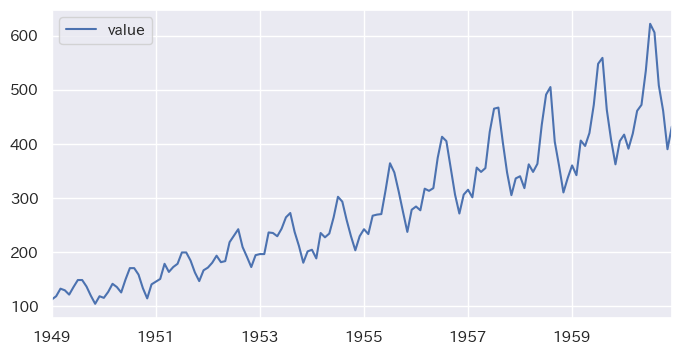

In [13]:
# ÊôÇÁ≥ªÂàóÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅÆ‰ΩúÊàê
air_passengers.plot()

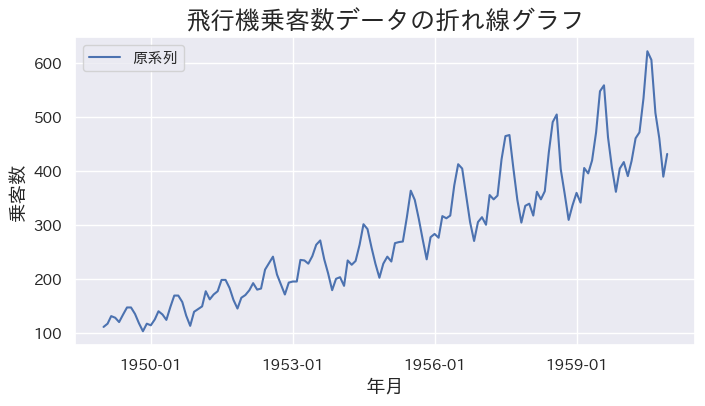

In [14]:
# ================================================
# È£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„ÅÆÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅÆÊèèÁîª
# ================================================

# „Ç∞„É©„Éï„Çµ„Ç§„Ç∫„ÅÆÊåáÂÆö
fig, ax = plt.subplots(figsize=(8, 4))

# Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÇíÊèè„Åè
#   'value' Âàó„Å´Êúà„Åî„Å®„ÅÆ‰πóÂÆ¢Êï∞„ÅåÂÖ•„Å£„Å¶„ÅÑ„Çã
ax.plot(air_passengers["value"], label="ÂéüÁ≥ªÂàó")

# Ëª∏„É©„Éô„É´„Å®„Çø„Ç§„Éà„É´„ÉªÂá°‰æã
ax.set_xlabel("Âπ¥Êúà", size=14)  # xËª∏„É©„Éô„É´
ax.set_ylabel("‰πóÂÆ¢Êï∞", size=14)  # yËª∏„É©„Éô„É´
ax.set_title("È£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„ÅÆÊäò„ÇåÁ∑ö„Ç∞„É©„Éï", size=18)  # „Ç∞„É©„Éï„Çø„Ç§„Éà„É´
ax.legend()  # Âá°‰æã„ÅÆË°®Á§∫

# ---- xËª∏ÔºàÂπ¥ÊúàÔºâ„ÅÆË®≠ÂÆö ----
# 3Âπ¥„Åî„Å®„Å´ÁõÆÁõõ„Çä„ÇíË°®Á§∫Ôºà1949, 1952, 1955, ‚Ä¶Ôºâ
ax.xaxis.set_major_locator(mdates.YearLocator(3))

# Ëª∏„É©„Éô„É´„ÅÆ„Éï„Ç©„Éº„Éû„ÉÉ„Éà„Çí„ÄåYYYY-MM„Äç„Å´Ë®≠ÂÆö
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

In [15]:
# „Éá„Éº„Çø„Çí„Ç≥„Éî„ÉºÔºàÂÖÉ„ÅÆ„Éá„Éº„Çø„ÇíÂ£ä„Åï„Å™„ÅÑ„Çà„ÅÜ„Å´Âà•„ÅÆÂ§âÊï∞„Å´Ë§áË£Ω„Åô„ÇãÔºâ
air_passengers_lag = air_passengers.copy()

# 1ÊôÇÁÇπÔºà1„ÅãÊúàÔºâÂâç„ÅÆ„Éá„Éº„Çø„Çí„Äålag1„ÄçÂàó„Å®„Åó„Å¶ËøΩÂä†
# shift(1) „ÅØË°å„Çí‰∏ãÊñπÂêë„Å´1„Å§„Åö„Çâ„Åô ‚Üí t „ÅÆË°å„Å´ t-1 „ÅÆÂÄ§„ÅåÂÖ•„Çã
# ÊôÇÁ≥ªÂàóËß£Êûê„Åß„É©„Ç∞Â§âÊï∞ÔºàÈÅÖ„ÇåÂ§âÊï∞Ôºâ„Çí‰Ωú„ÇãÂÖ∏ÂûãÁöÑ„Å™ÊñπÊ≥ï
air_passengers_lag["lag1"] = air_passengers_lag["value"].shift(1)

# ÁµêÊûú„ÅÆÁ¢∫Ë™çÔºàÊúÄÂàù„ÅÆ3Ë°åÔºâ
# ‚Üí ÂÖàÈ†≠Ë°å„Å´„ÅØ1„Å§Ââç„ÅÆ„Éá„Éº„Çø„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„ÅÆ„Åß NaN „ÅåÂÖ•„Çã
print(air_passengers_lag.head(3))

# ÁµêÊûú„ÅÆÁ¢∫Ë™çÔºàÊúÄÂæå„ÅÆ3Ë°åÔºâ
# ‚Üí ÊúÄÂæå„ÅÆË°å„Å´„ÅØ1„Å§ÂÖà„ÅÆ„Éá„Éº„Çø„Åå„Å™„ÅÑ„ÅÆ„Åß value „ÅÆ„ÅøË°®Á§∫„Åï„Çå„ÄÅlag1 „ÅØ1„Å§Ââç„ÅÆÂÄ§„Å´„Å™„Çã
print(air_passengers_lag.tail(3))

            value   lag1
1949-01-01    112    NaN
1949-02-01    118  112.0
1949-03-01    132  118.0
            value   lag1
1960-10-01    461  508.0
1960-11-01    390  461.0
1960-12-01    432  390.0


In [16]:
# 2ÊôÇÁÇπÂâç„ÅÆ„Éá„Éº„Çø„Çí„Äålag2„ÄçÂàó„Å®„Åó„Å¶ËøΩÂä†
# shift(2) ‚Üí t „ÅÆË°å„Å´ t-2 „ÅÆÂÄ§„ÅåÂÖ•„Çã
# „Å§„Åæ„Çä2„ÅãÊúàÂâç„ÅÆ‰πóÂÆ¢Êï∞„ÇíÁâπÂæ¥Èáè„Å®„Åó„Å¶‰ΩúÊàê
air_passengers_lag["lag2"] = air_passengers_lag["value"].shift(2)

# ÈÄÜ„Å´Êú™Êù•„ÅÆ„Éá„Éº„Çø„ÇíÂèÇÁÖß„Åô„Çã‰æã„Å®„Åó„Å¶„Äålead1„ÄçÂàó„ÇíËøΩÂä†
# shift(-1) ‚Üí t „ÅÆË°å„Å´ t+1 „ÅÆÂÄ§„ÅåÂÖ•„Çã
# „Å§„Åæ„Çä1„ÅãÊúàÂæå„ÅÆ‰πóÂÆ¢Êï∞„ÇíÂàó„Å®„Åó„Å¶‰ΩúÊàêÔºàÈÄöÂ∏∏„ÅØÂàÜÊûê„Åß„ÅØ‰Ωø„Çè„Å™„ÅÑ„ÅåÁ¢∫Ë™çÁî®Ôºâ
air_passengers_lag["lead1"] = air_passengers_lag["value"].shift(-1)

# ÁµêÊûú„ÅÆÁ¢∫Ë™çÔºàÊúÄÂàù„ÅÆ3Ë°åÔºâ
# ‚Üí lag2 „ÅØÊúÄÂàù„ÅÆ2Ë°å„Åå NaN, lead1 „ÅØÊú™Êù•„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„ÅÆ„ÅßÊúÄÂæå„ÅÆË°å„Åå NaN
print(air_passengers_lag.head(3))

# ÁµêÊûú„ÅÆÁ¢∫Ë™çÔºàÊúÄÂæå„ÅÆ3Ë°åÔºâ
# ‚Üí lag1, lag2 „ÅØÁõ¥Ââç„ÇÑ2„Å§Ââç„ÅÆÂÄ§„ÅåÂÖ•„Çã
# ‚Üí lead1 „ÅØÊúÄÂæå„ÅÆË°å„Åå NaN „Å´„Å™„Çã
print(air_passengers_lag.tail(3))

            value   lag1   lag2  lead1
1949-01-01    112    NaN    NaN  118.0
1949-02-01    118  112.0    NaN  132.0
1949-03-01    132  118.0  112.0  129.0
            value   lag1   lag2  lead1
1960-10-01    461  508.0  606.0  390.0
1960-11-01    390  461.0  508.0  432.0
1960-12-01    432  390.0  461.0    NaN


In [17]:
# Â∑ÆÂàÜÂÄ§„ÅÆË®àÁÆó
# ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆ„ÄåÈùûÂÆöÂ∏∏ÊÄß„Äç„ÇíÂèñ„ÇäÈô§„Åè„Åü„ÇÅ„Å´„Çà„ÅèË°å„ÅÜÂá¶ÁêÜ
# Â∑ÆÂàÜ = ÂΩìÊúà„ÅÆÂÄ§ - ÂâçÊúà„ÅÆÂÄ§
# Ôºà‰æãÔºö1Êúà„ÅÆÂÄ§ - ÂâçÊúà12Êúà„ÅÆÂÄ§Ôºâ
diff_value = air_passengers_lag["value"] - air_passengers_lag["value"].shift(1)

# ÂÖàÈ†≠3Ë°å„ÇíË°®Á§∫
# ‚Üí 1Ë°åÁõÆ„ÅØÂâçÊúà„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„Åü„ÇÅ NaN
# ‚Üí 2Ë°åÁõÆ‰ª•Èôç„ÅØÂÆüÈöõ„ÅÆÂ∑ÆÂàÜÂÄ§„ÅåË°®Á§∫„Åï„Çå„Çã
diff_value.head(3)

1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
Freq: MS, Name: value, dtype: float64

In [18]:
# „Éá„Éº„Çø„Çí„Ç≥„Éî„Éº
# ÂÖÉ„ÅÆ„Éá„Éº„Çø„ÇíÁõ¥Êé•Êõ∏„ÅçÊèõ„Åà„Å™„ÅÑ„Çà„ÅÜ„Å´„ÄÅÊñ∞„Åó„ÅÑDataFrame„Çí‰ΩúÊàê„Åô„Çã
air_passengers_diff = air_passengers.copy()

# Â∑ÆÂàÜÁ≥ªÂàó„ÇíË®àÁÆó
# .diff(1) „ÅØ„Äå1ÊúüÂâç„Å®„ÅÆÂ∑Æ„Äç„ÇíË®àÁÆó„Åô„ÇãÔºàÔºù1ÈöéÂ∑ÆÂàÜÔºâ
# ÊôÇÁ≥ªÂàó„ÅÆ„Éà„É¨„É≥„Éâ„ÇíÂèñ„ÇäÈô§„Åç„ÄÅÂÆöÂ∏∏Âåñ„Å´Ëøë„Å•„Åë„Çã„Åü„ÇÅ„Å´„Çà„ÅèÁî®„ÅÑ„Çâ„Çå„ÇãÊâãÊ≥ï
air_passengers_diff["diff1"] = air_passengers_diff["value"].diff(1)

# ÁµêÊûú„ÅÆÁ¢∫Ë™ç
# ÂÖàÈ†≠3Ë°å„ÇíË°®Á§∫ÔºàÊúÄÂàù„ÅÆË°å„ÅØÂâç„ÅÆÂÄ§„Åå„Å™„ÅÑ„ÅÆ„ÅßNaN„Å´„Å™„ÇãÔºâ
print(air_passengers_diff.head(3))

# Êú´Â∞æ3Ë°å„ÇíË°®Á§∫ÔºàÁµÇÁõ§„ÅÆÂ∑ÆÂàÜ„Åå„Å©„ÅÆ„Çà„ÅÜ„Å™ÂÄ§„Å´„Å™„Å£„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™çÔºâ
print(air_passengers_diff.tail(3))

            value  diff1
1949-01-01    112    NaN
1949-02-01    118    6.0
1949-03-01    132   14.0
            value  diff1
1960-10-01    461  -47.0
1960-11-01    390  -71.0
1960-12-01    432   42.0


In [19]:
# Â≠£ÁØÄÂ∑ÆÂàÜ„ÇíË®àÁÆó
# .diff(12) „ÅØ„Äå12ÊúüÂâç„Å®„ÅÆÂ∑Æ„Äç„ÇíË®àÁÆó„Åô„Çã
# ‰ªäÂõû„ÅÆ„Éá„Éº„Çø„ÅØÊúàÊ¨°„Éá„Éº„Çø„Å™„ÅÆ„Åß„Äå12„É∂ÊúàÂâç„Å®„ÅÆÂ∑Æ„ÄçÔºù„ÄåÂâçÂπ¥ÂêåÊúà„Å®„ÅÆÂ∑ÆÂàÜ„Äç„Å®„Å™„Çã
# Â≠£ÁØÄÊÄßÔºàÊØéÂπ¥Áπ∞„ÇäËøî„Åï„Çå„Çã„Éë„Çø„Éº„É≥Ôºâ„ÇíÂèñ„ÇäÈô§„Åè„Åü„ÇÅ„Å´Âà©Áî®„Åï„Çå„Çã
air_passengers_diff["diff12"] = air_passengers_diff["value"].diff(12)

<Axes: >

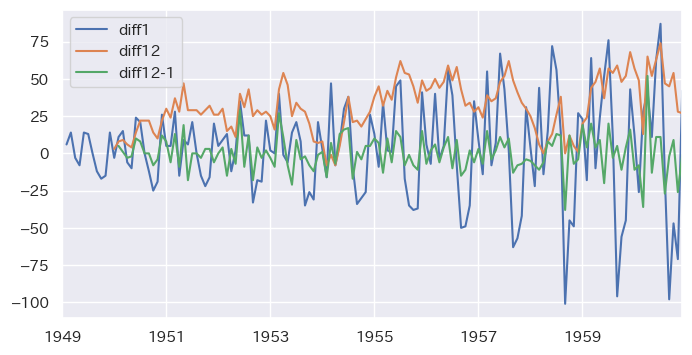

In [20]:
# Â≠£ÁØÄÂ∑ÆÂàÜÁ≥ªÂàó„Å´ÂØæ„Åó„Å¶„ÄÅ„Åï„Çâ„Å´1ÈöéÂ∑ÆÂàÜ„Çí„Å®„Çã
# „Åæ„Åö„Äå12ÊúüÂâç„Å®„ÅÆÂ∑Æ„ÄçÔºàÂ≠£ÁØÄÂ∑ÆÂàÜ diff12Ôºâ„ÇíË®àÁÆóÊ∏à„Åø
# „Åù„Åì„Åã„Çâ„Åï„Çâ„Å´„Äå1ÊúüÂâç„Å®„ÅÆÂ∑Æ„Äç„ÇíË®àÁÆó„Åô„Çã„Åì„Å®„Åß„ÄÅÂ≠£ÁØÄÊÄß„Å®„Éà„É¨„É≥„Éâ„ÅÆ‰∏°Êñπ„ÇíÂèñ„ÇäÈô§„ÅÑ„ÅüÁ≥ªÂàó„Å´„Å™„Çã
# ‚Üí ARIMA„ÇÑSARIMA„É¢„Éá„É´„ÅÆÂâçÂá¶ÁêÜ„Åß„Çà„Åè‰Ωø„Çè„Çå„Çã
air_passengers_diff["diff12-1"] = air_passengers_diff["diff12"].diff(1)

# ÊôÇÁ≥ªÂàóÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„Çí‰ΩúÊàê
# diff1     : ÈÄöÂ∏∏„ÅÆ1ÈöéÂ∑ÆÂàÜÔºà„Éà„É¨„É≥„ÉâÈô§ÂéªÁî®Ôºâ
# diff12    : Â≠£ÁØÄÂ∑ÆÂàÜÔºàÂâçÂπ¥ÂêåÊúà„Å®„ÅÆÂ∑ÆÔºâ
# diff12-1  : Â≠£ÁØÄÂ∑ÆÂàÜ„Çí„Åï„Çâ„Å´Â∑ÆÂàÜ„Åó„Åü„ÇÇ„ÅÆÔºà„Éà„É¨„É≥„Éâ + Â≠£ÁØÄÊÄß„ÇíÈô§ÂéªÔºâ
air_passengers_diff[["diff1", "diff12", "diff12-1"]].plot()

In [21]:
# ÂèÇËÄÉÔºöÂ∑ÆÂàÜ„Çí„Å®„ÇãÈ†ÜÁï™„ÅØÈñ¢‰øÇ„Å™„ÅÑ„Åì„Å®„ÅÆÁ¢∫Ë™ç
# diff12-1 : „Åæ„Åö12ÊúüÂ∑ÆÂàÜ„Çí„Å®„Çä„ÄÅ„Åù„ÅÆÂæå„Å´1ÊúüÂ∑ÆÂàÜ„Çí„Å®„Å£„Åü„ÇÇ„ÅÆ
# diff1-12 : „Åæ„Åö1ÊúüÂ∑ÆÂàÜ„Çí„Å®„Çä„ÄÅ„Åù„ÅÆÂæå„Å´12ÊúüÂ∑ÆÂàÜ„Çí„Å®„Å£„Åü„ÇÇ„ÅÆ
air_passengers_diff["diff1-12"] = air_passengers_diff["diff1"].diff(12)

# dropna() „Åß NaN „ÇíÈô§Âéª„Åó„Åü‰∏ä„Åß„ÄÅ‰∏°ËÄÖ„ÅåÂÆåÂÖ®„Å´‰∏ÄËá¥„Åô„Çã„Åã„Çí„ÉÅ„Çß„ÉÉ„ÇØ
# True „ÅåËøî„Çå„Å∞„ÄåÂ∑ÆÂàÜ„ÅÆÈ†ÜÁï™„ÅØÈñ¢‰øÇ„Å™„ÅÑ„Äç„Å®„ÅÑ„ÅÜ„Åì„Å®„Å´„Å™„Çã
all(
    air_passengers_diff["diff12-1"].dropna() == air_passengers_diff["diff1-12"].dropna()
)

True

<Axes: >

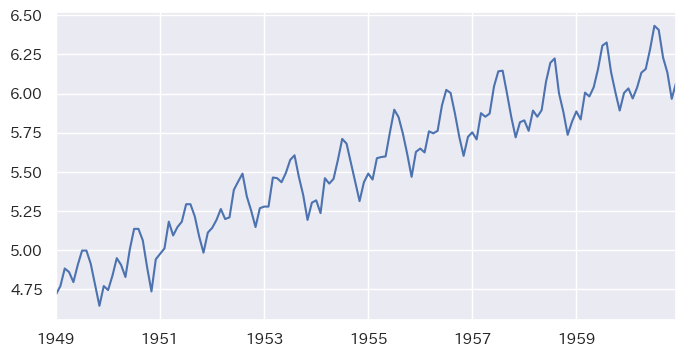

In [22]:
# „Éá„Éº„Çø„Çí„Ç≥„Éî„ÉºÔºàÂÖÉ„Éá„Éº„Çø„ÇíÂ£ä„Åï„Å™„ÅÑ„Åü„ÇÅ„Å´„Ç≥„Éî„Éº„Çí‰ΩúÊàêÔºâ
air_passengers_log = air_passengers.copy()

# ÂØæÊï∞Â§âÊèõ„ÇíË°å„ÅÜ
# - ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Åß„ÅØ„ÄÅÂàÜÊï£„ÅåÂ§ß„Åç„Åè„Å™„ÇãÔºàÂ§âÂãïÂπÖ„ÅåÂπ¥Êúà„Å®„Å®„ÇÇ„Å´Â§ß„Åç„Åè„Å™„ÇãÔºâ„Åì„Å®„ÅåÂ§ö„ÅÑ
# - ÂØæÊï∞Â§âÊèõ„Çí‰Ωø„ÅÜ„Å®„ÄåÂ§âÂãï„ÅÆÂ§ß„Åç„Åï„ÇíÁõ∏ÂØæÁöÑ„Å´Âùá‰∏ÄÂåñ„Äç„Åß„Åç„ÇãÔºàÂàÜÊï£ÂÆâÂÆöÂåñÔºâ
# - ‰∫àÊ∏¨„É¢„Éá„É´ÔºàARIMA„Å™„Å©Ôºâ„Å´„Åä„ÅÑ„Å¶„ÇÇ„Çà„Åè‰Ωø„Çè„Çå„ÇãÂâçÂá¶ÁêÜ
air_passengers_log["log"] = air_passengers_log["value"].apply(np.log)

# ÂØæÊï∞Â§âÊèõÂæå„ÅÆÁ≥ªÂàó„ÇíÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅßÊèèÁîª
# ÂÖÉ„ÅÆÂÄ§„Å®ÊØîËºÉ„Åó„Å¶„ÄåÁ∑©„ÇÑ„Åã„Å™Âè≥ËÇ©‰∏ä„Åå„Çä„Äç„Å´„Å™„Çã„Åì„Å®„ÅåÁ¢∫Ë™ç„Åß„Åç„Çã
air_passengers_log["log"].plot()

In [23]:
# ÂØæÊï∞Â§âÊèõ„Çí„ÇÇ„Å®„Å´Êàª„ÅôÔºàÈÄÜÂ§âÊèõÔºâ
# - np.exp „ÅØËá™ÁÑ∂ÂØæÊï∞„ÅÆÈÄÜÈñ¢Êï∞ÔºàÊåáÊï∞Èñ¢Êï∞ e^xÔºâ
# - „Åì„Çå„Å´„Çà„ÇäÂØæÊï∞Â§âÊèõÂâç„ÅÆÂÖÉ„ÅÆ„Çπ„Ç±„Éº„É´„Å´Êàª„Åõ„Çã
# - „Éá„Éº„Çø„ÅÆÂ§âÊèõ„ÅåÊ≠£„Åó„ÅèË°å„Çè„Çå„Åü„ÅãÁ¢∫Ë™ç„Åô„ÇãÈöõ„Å´‰Ωø„ÅÜ
air_passengers_log["log"].apply(np.exp).head(3)

1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
Freq: MS, Name: log, dtype: float64

In [24]:
# ÂØæÊï∞Â∑ÆÂàÜÁ≥ªÂàó„ÅÆ‰ΩúÊàê
# - ÂØæÊï∞„ÇíÂèñ„Å£„ÅüÂÄ§„Å´ÂØæ„Åó„Å¶„ÄÅ1ÊúüÔºà1„ÅãÊúàÔºâÂâç„Å®„ÅÆÂ∑ÆÂàÜ„ÇíË®àÁÆó
# - „Åì„Çå„Å´„Çà„Çä„Éá„Éº„Çø„ÅÆ„Éà„É¨„É≥„ÉâÔºàÈï∑ÊúüÁöÑ„Å™‰∏äÊòáÂÇæÂêëÔºâ„ÅåÈô§Âéª„Åï„Çå„Çã
air_passengers_log["log_diff1"] = air_passengers_log["log"].diff(1)

# ÂØæÊï∞Â≠£ÁØÄÂ∑ÆÂàÜÁ≥ªÂàó„ÅÆ‰ΩúÊàê
# - ÂØæÊï∞„ÇíÂèñ„Å£„ÅüÂÄ§„Å´ÂØæ„Åó„Å¶„ÄÅ12ÊúüÔºà1Âπ¥ÔºâÂâç„Å®„ÅÆÂ∑ÆÂàÜ„ÇíË®àÁÆó
# - „Åì„Çå„Å´„Çà„ÇäÂ≠£ÁØÄÊÄßÔºàÊØéÂπ¥Áπ∞„ÇäËøî„Åô„Éë„Çø„Éº„É≥Ôºâ„ÅåÈô§Âéª„Åï„Çå„Çã
air_passengers_log["log_diff12"] = air_passengers_log["log"].diff(12)

<Axes: >

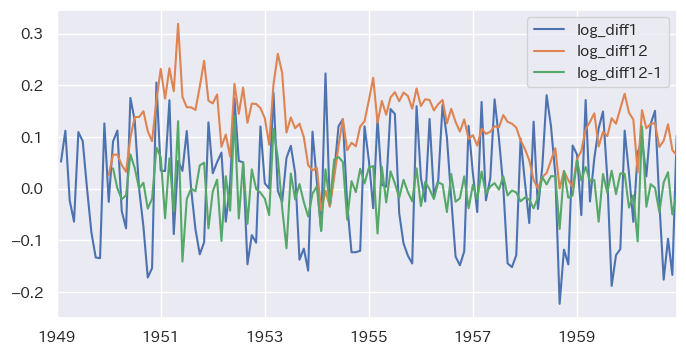

In [25]:
# ÂØæÊï∞Â≠£ÁØÄÂ∑ÆÂàÜÁ≥ªÂàó„Å´ÂØæ„Åó„Å¶„ÄÅ„Åï„Çâ„Å´ÈÄöÂ∏∏„ÅÆÂ∑ÆÂàÜ„ÇíÂèñ„Çã
# - log_diff12: Â≠£ÁØÄÊÄß„ÇíÈô§Âéª„Åó„ÅüÁ≥ªÂàó
# - „Åù„ÅÆ‰∏ä„Åß diff(1) „ÇíÂèñ„Çã„Åì„Å®„Åß„ÄÅÊÆã„Å£„Å¶„ÅÑ„Çã„Éà„É¨„É≥„ÉâÊàêÂàÜ„ÇÇÈô§Âéª
# - „Äå„Éà„É¨„É≥„ÉâÔºãÂ≠£ÁØÄÊÄß„Äç„ÇíÂèñ„ÇäÈô§„ÅÑ„Åü„ÄÅ„Çà„ÇäÂÆöÂ∏∏ÁöÑ„Å™Á≥ªÂàó„ÇíÂæó„Çâ„Çå„Çã
air_passengers_log["log_diff12-1"] = air_passengers_log["log_diff12"].diff(1)

# ÊôÇÁ≥ªÂàóÊäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÇíÊèèÁîª
# - log_diff1: „Éà„É¨„É≥„Éâ„ÇíÈô§Âéª„Åó„ÅüÁ≥ªÂàó
# - log_diff12: Â≠£ÁØÄÊÄß„ÇíÈô§Âéª„Åó„ÅüÁ≥ªÂàó
# - log_diff12-1: Â≠£ÁØÄÊÄß„ÇíÈô§Âéª„Åó„Åü‰∏ä„Åß„Åï„Çâ„Å´Â∑ÆÂàÜ„ÇíÂèñ„Çä„ÄÅÂÆöÂ∏∏ÊÄß„ÇíÈ´ò„ÇÅ„ÅüÁ≥ªÂàó
air_passengers_log[["log_diff1", "log_diff12", "log_diff12-1"]].plot()

In [26]:
# Ëá™Â∑±Áõ∏Èñ¢‰øÇÊï∞ÔºàAutocorrelation Function: ACFÔºâ„ÅÆË®àÁÆó
# nlags=12 „Å®„Åó„Å¶„ÄÅ„É©„Ç∞0„Åã„Çâ„É©„Ç∞12„Åæ„Åß„ÅÆËá™Â∑±Áõ∏Èñ¢‰øÇÊï∞„ÇíÁÆóÂá∫„Åô„Çã
# Ëá™Â∑±Áõ∏Èñ¢‰øÇÊï∞„ÅØ„ÄåÊôÇÁ≥ªÂàó„Åå„Å©„ÅÆÁ®ãÂ∫¶Ëá™Â∑±Áõ∏Èñ¢„ÇíÊåÅ„Å§„ÅãÔºàÈÅéÂéª„ÅÆÂÄ§„Å®ÁèæÂú®„ÅÆÂÄ§„Åå„Å©„ÅÆÁ®ãÂ∫¶Èñ¢‰øÇ„Åó„Å¶„ÅÑ„Çã„ÅãÔºâ„Äç„ÇíÁ§∫„ÅôÊåáÊ®ô„Åß„ÅÇ„Çã
tsa.acf(air_passengers["value"], nlags=12)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542, 0.71376997,
       0.6817336 , 0.66290439, 0.65561048, 0.67094833, 0.70271992, 0.74324019,
       0.76039504])

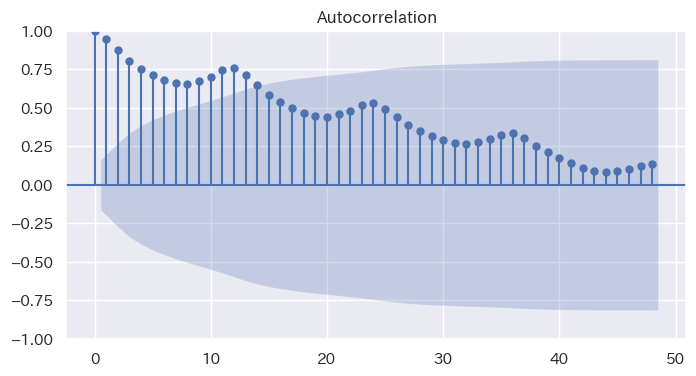

In [27]:
# „Ç≥„É¨„É≠„Ç∞„É©„É†ÔºàËá™Â∑±Áõ∏Èñ¢Èñ¢Êï∞„ÅÆ„Ç∞„É©„ÉïÔºâ„ÅÆ‰ΩúÊàê
# lags=48 „Å®„Åó„Å¶„ÄÅ„É©„Ç∞0„Åã„Çâ„É©„Ç∞48„Åæ„Åß„ÅÆËá™Â∑±Áõ∏Èñ¢‰øÇÊï∞„ÇíÂèØË¶ñÂåñ„Åô„Çã
# Á∏¶„ÅÆÁÇπÁ∑öÔºàÈùíËâ≤„ÅÆÂ∏ØÔºâ„ÅØ„ÄåÊúâÊÑèÊ∞¥Ê∫ñ„ÅÆ95%‰ø°È†ºÂå∫Èñì„Äç„ÇíË°®„Åó„Å¶„Åä„Çä„ÄÅ
# Ê£í„Ç∞„É©„Éï„Åå„Åì„ÅÆÂ∏Ø„ÇíË∂Ö„Åà„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÄÅ„Åù„ÅÆ„É©„Ç∞„ÅßÊúâÊÑè„Å™Ëá™Â∑±Áõ∏Èñ¢„Åå„ÅÇ„Çã„Å®Âà§Êñ≠„Åß„Åç„Çã
_ = sm.graphics.tsa.plot_acf(air_passengers["value"], lags=48)

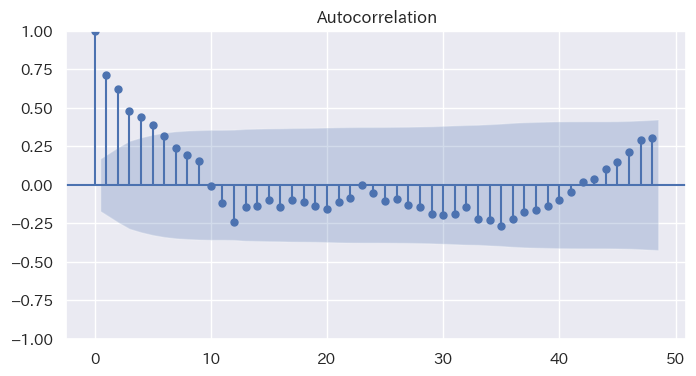

In [28]:
# ÂØæÊï∞Â∑ÆÂàÜÁ≥ªÂàóÔºà12„É∂Êúà„ÅÆÂ≠£ÁØÄÂ∑ÆÂàÜÔºâ„ÅÆ„Ç≥„É¨„É≠„Ç∞„É©„É†
# dropna() „ÅßÂÖàÈ†≠„ÅÆ NaN „ÇíÈô§Âéª„Åó„Å¶„ÅÑ„Çã
# lags=48 „Å®„Åó„Å¶„ÄÅÊúÄÂ§ß48„É©„Ç∞ÂÖà„Åæ„Åß„ÅÆËá™Â∑±Áõ∏Èñ¢„ÇíË°®Á§∫„Åô„Çã
# Â≠£ÁØÄÂ∑ÆÂàÜ„ÇíÂèñ„Å£„Åü„Åü„ÇÅ„ÄÅÂÖÉ„ÅÆÁ≥ªÂàó„Å´Ë¶ã„Çâ„Çå„ÅüÂº∑„ÅÑ„Éà„É¨„É≥„Éâ„ÇÑÂ≠£ÁØÄÊÄß„ÅØÂº±„Åæ„Çä„ÄÅ
# „Çà„Çä„ÄåÂÆöÂ∏∏ÁöÑ„Äç„Å™Ëá™Â∑±Áõ∏Èñ¢„Éë„Çø„Éº„É≥„ÇíË¶≥ÂØü„Åß„Åç„Çã
_ = sm.graphics.tsa.plot_acf(air_passengers_log["log_diff12"].dropna(), lags=48)

<Axes: xlabel='value', ylabel='value'>

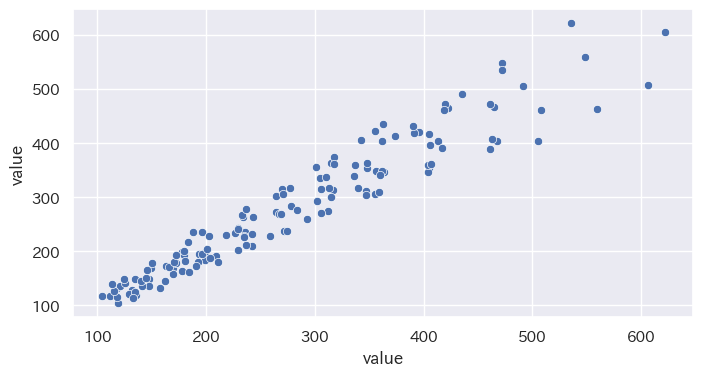

In [29]:
# Ê≠£„ÅÆËá™Â∑±Áõ∏Èñ¢„ÅÆ„Ç§„É°„Éº„Ç∏„ÇíÂèØË¶ñÂåñ„Åô„ÇãÊï£Â∏ÉÂõ≥
# xËª∏„Å´„ÅØ1ÊúüÂâçÔºàlag=1Ôºâ„ÅÆ‰πóÂÆ¢Êï∞„ÄÅyËª∏„Å´„ÅØÂΩìÊúü„ÅÆ‰πóÂÆ¢Êï∞„ÇíÈÖçÁΩÆ„Åô„Çã
# „ÇÇ„ÅóÁ≥ªÂàó„ÅåÂº∑„ÅÑÊ≠£„ÅÆËá™Â∑±Áõ∏Èñ¢„ÇíÊåÅ„Å§„Å™„Çâ„ÄÅÁÇπ„ÅØÂè≥‰∏ä„Åå„Çä„ÅÆÁõ¥Á∑ö„Å´Ëøë„ÅÑÂàÜÂ∏É„Å´„Å™„Çã
sns.scatterplot(
    x=air_passengers["value"].shift(1),  # 1ÊúüÂâç„ÅÆÂÄ§
    y=air_passengers["value"],  # ÁèæÂú®„ÅÆÂÄ§
)

<Axes: xlabel='log_diff12', ylabel='log_diff12'>

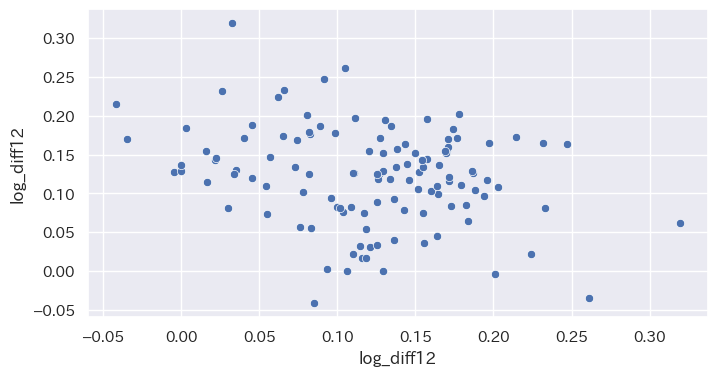

In [30]:
# Ë≤†„ÅÆËá™Â∑±Áõ∏Èñ¢„ÅÆ„Ç§„É°„Éº„Ç∏„ÇíÂèØË¶ñÂåñ„Åô„ÇãÊï£Â∏ÉÂõ≥
# xËª∏„Å´„ÅØ12ÊúüÂâçÔºà„É©„Ç∞=12Ôºâ„ÅÆÂØæÊï∞Â∑ÆÂàÜÁ≥ªÂàó„ÅÆÂÄ§„ÄÅ
# yËª∏„Å´„ÅØÂΩìÊúü„ÅÆÂØæÊï∞Â∑ÆÂàÜÁ≥ªÂàó„ÅÆÂÄ§„ÇíÈÖçÁΩÆ„Åô„Çã„ÄÇ
# Ë≤†„ÅÆËá™Â∑±Áõ∏Èñ¢„Åå„ÅÇ„ÇãÂ†¥Âêà„ÄÅÁÇπ„ÅØÂè≥‰∏ã„Åå„Çä„ÅÆÁõ¥Á∑ö„Å´Ëøë„ÅÑÂàÜÂ∏É„ÇíÁ§∫„Åô„ÄÇ
sns.scatterplot(
    x=air_passengers_log["log_diff12"].shift(12),  # 12ÊúüÂâç„ÅÆÂÄ§
    y=air_passengers_log["log_diff12"],  # ÁèæÂú®„ÅÆÂÄ§
)

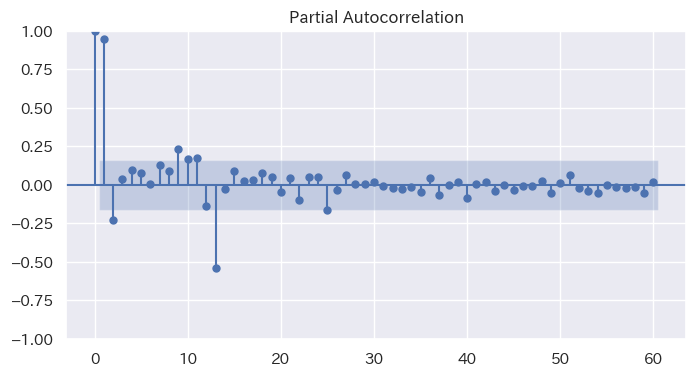

In [31]:
# ÂÅèËá™Â∑±Áõ∏Èñ¢‰øÇÊï∞„ÅÆ„Ç≥„É¨„É≠„Ç∞„É©„É†ÔºàPartial Autocorrelation Function: PACFÔºâ
# plot_pacf„Çí‰Ωø„ÅÜ„Å®„ÄÅ„ÅÇ„Çã„É©„Ç∞„Å´„Åä„Åë„ÇãËá™Â∑±Áõ∏Èñ¢„Åå„ÄÅ
# „Åù„Çå‰ª•Ââç„ÅÆ„É©„Ç∞„ÅÆÂΩ±Èüø„ÇíÂèñ„ÇäÈô§„ÅÑ„Åü„ÄåÁ¥îÁ≤ã„Å™Áõ∏Èñ¢„Äç„Å®„Åó„Å¶Ë®àÁÆó„Åï„Çå„Çã„ÄÇ
# - lags=60: 60ÊúüÔºà60„ÅãÊúà = 5Âπ¥ÈñìÔºâ„Åæ„Åß„ÅÆ„É©„Ç∞„ÇíË°®Á§∫
# - method='ywm': Yule-WalkerÊñπÁ®ãÂºè„Å´Âü∫„Å•„ÅèÊé®ÂÆöÊñπÊ≥ï„ÇíÊåáÂÆö
_ = sm.graphics.tsa.plot_pacf(
    air_passengers["value"],  # ÂÖÉ„Éá„Éº„Çø
    lags=60,  # „É©„Ç∞„ÅÆÊúÄÂ§ßÊï∞
    method="ywm",  # ÂÅèËá™Â∑±Áõ∏Èñ¢„ÅÆÊé®ÂÆöÊñπÊ≥ï
)

In [32]:
# „Éá„Éº„Çø„Çí„Ç≥„Éî„Éº
air_passengers_ma = air_passengers.copy()
# ‚Üí ÂÖÉ„ÅÆÈ£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„ÇíË§áË£Ω„Åó„Å¶„ÄÅÊñ∞„Åó„ÅÑDataFrame„Å´‰øùÂ≠ò„Åô„Çã„ÄÇ
#   ÔºàÂÖÉ„Éá„Éº„Çø„Çí‰∏äÊõ∏„Åç„Åó„Å™„ÅÑ„Çà„ÅÜ„Å´„Åô„Çã„Åü„ÇÅÔºâ

# 5ÊôÇÁÇπ„ÅÆÁßªÂãïÂπ≥Âùá
air_passengers_ma["ma5"] = air_passengers_ma["value"].rolling(window=5).mean()
# ‚Üí „ÄåÈÅéÂéª5ÊúüÈñìÔºà5„ÅãÊúàÔºâ„Äç„ÅÆ„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶Âπ≥Âùá„ÇíÁÆóÂá∫„Åô„Çã„ÄÇ
#   ‰æãÔºö5Êúà„ÅÆÂπ≥ÂùáÂÄ§„ÅØ1Êúà„Äú5Êúà„ÅÆÂπ≥Âùá„ÄÇ
#   ‚Üí „Éà„É¨„É≥„Éâ„ÅÆÊªë„Çâ„Åã„Å™Âãï„Åç„ÇíÊçâ„Åà„ÇãÔºàÁü≠ÊúüÂ§âÂãï„ÇíÈô§ÂéªÔºâ„ÄÇ

# 5ÊôÇÁÇπ„ÅÆÁßªÂãïÂπ≥Âùá„Å´„Åä„ÅÑ„Å¶„ÄÅÂΩìË©≤ÊôÇÁÇπ„Çí‰∏≠ÂøÉ„Å´„Åô„Çã
air_passengers_ma["ma5_center"] = (
    air_passengers_ma["value"].rolling(window=5, center=True).mean()
)
# ‚Üí Âêå„Åò„Åè5ÊúüÈñì„ÅÆÁßªÂãïÂπ≥Âùá„Å†„Åå„ÄÅ„Äå‰∏≠ÂøÉ„Äç„ÇíÁèæÂú®„ÅÆÊúà„Å´Âêà„Çè„Åõ„Å¶Âπ≥Âùá„ÇíË®àÁÆó„Åô„Çã„ÄÇ
#   ‰æãÔºö5Êúà„ÅÆÂπ≥ÂùáÂÄ§„ÅØ3Êúà„Äú7Êúà„ÅÆÂπ≥Âùá„ÄÇ
#   ‚Üí „Çà„Çä„Éà„É¨„É≥„Éâ„ÇíÂØæÁß∞ÁöÑ„Å´Êªë„Çâ„Åã„Å´Ë°®„Åô„ÄÇ

# ÁµêÊûú„ÅÆÁ¢∫Ë™ç
print(air_passengers_ma.head(6))
# ‚Üí ÊúÄÂàù„ÅÆ6Ë°å„ÇíË°®Á§∫„Åó„Å¶„ÄÅÁßªÂãïÂπ≥Âùá„ÅÆË®àÁÆóÁµêÊûú„ÇíÁ¢∫Ë™ç„ÄÇ
#   ÊúÄÂàù„ÅÆÊï∞Ë°å„ÅØÊ¨†ÊêçÂÄ§ÔºàNaNÔºâ„Å´„Å™„ÇãÔºà5ÊúüÈñìÂàÜ„Åù„Çç„Çè„Å™„ÅÑ„Åü„ÇÅÔºâ„ÄÇ

            value    ma5  ma5_center
1949-01-01    112    NaN         NaN
1949-02-01    118    NaN         NaN
1949-03-01    132    NaN       122.4
1949-04-01    129    NaN       127.0
1949-05-01    121  122.4       133.0
1949-06-01    135  127.0       136.2


In [ ]:
# 4ÊôÇÁÇπÁßªÂãïÂπ≥Âùá
air_passengers_ma["ma4_center"] = (
    air_passengers_ma["value"].rolling(window=4, center=True).mean()
)
# ‚Üí „Äå4ÊúüÈñìÔºà4„ÅãÊúàÔºâ„Äç„ÅÆ„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶ÁßªÂãïÂπ≥Âùá„ÇíÁÆóÂá∫„Åô„Çã„ÄÇ
#   'center=True' „Å´„Çà„Çä„ÄÅÁèæÂú®„ÅÆÊôÇÁÇπ„Çí‰∏≠ÂøÉ„Å´2ÊúüÈñìÂâç„Äú1ÊúüÈñìÂæå„ÅÆÂÄ§„ÇíÂπ≥ÂùáÂåñ„ÄÇ
#   ‰æãÔºö4Êúà„ÅÆÂÄ§„ÅØ„Äå2Êúà„Éª3Êúà„Éª4Êúà„Éª5Êúà„Äç„ÅÆÂπ≥Âùá„Å´„Å™„Çã„ÄÇ
#   ‚Üí ÂÅ∂Êï∞ÊúüÈñì„ÅÆÁßªÂãïÂπ≥Âùá„Åß„ÅØ„ÄÅÁµêÊûú„ÅåÊôÇÁ≥ªÂàó‰∏ä„ÅßÂçäÊúüÈñì„Åö„Çå„ÇãÂÇæÂêë„Åå„ÅÇ„Çã„ÄÇ

# ÁßªÂãïÂπ≥ÂùáÁµêÊûú„ÇíÁ¢∫Ë™ç
print(air_passengers_ma[["value", "ma4_center"]].head(4))
# ‚Üí „Éá„Éº„Çø„ÅÆÂÖàÈ†≠4Ë°å„ÇíË°®Á§∫„Åó„Å¶„ÄÅÊúÄÂàù„ÅÆÈÉ®ÂàÜ„ÅÆÂπ≥ÂùáÂÄ§„ÅåË®àÁÆó„Åï„Çå„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„ÄÇ
#   ÊúÄÂàù„ÅÆ2Ë°å„Åª„Å©„ÅØ„Éá„Éº„Çø„ÅåË∂≥„Çä„Å™„ÅÑ„Åü„ÇÅ NaN „Å´„Å™„Çã„ÄÇ

print(air_passengers_ma[["value", "ma4_center"]].tail(4))
# ‚Üí „Éá„Éº„Çø„ÅÆÊú´Â∞æ4Ë°å„ÇíË°®Á§∫„Åó„Å¶„ÄÅÁµÇÁõ§„ÅÆÂπ≥ÂùáÂÄ§„ÇÇÊ≠£„Åó„ÅèÁÆóÂá∫„Åï„Çå„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„ÄÇ
#   ÂêåÊßò„Å´ÊúÄÂæå„ÅÆÊï∞ÁÇπ„ÅØ NaN „Å´„Å™„ÇãÔºàÂπ≥Âùá„Å´ÂøÖË¶Å„Å™„Éá„Éº„Çø„Åå‰∏çË∂≥„Åô„Çã„Åü„ÇÅÔºâ„ÄÇ

            value  ma4_center
1949-01-01    112         NaN
1949-02-01    118         NaN
1949-03-01    132      122.75
1949-04-01    129      125.00
            value  ma4_center
1960-09-01    508      549.25
1960-10-01    461      491.25
1960-11-01    390      447.75
1960-12-01    432         NaN


In [34]:
# Âä†ÈáçÁßªÂãïÂπ≥ÂùáÔºàWeighted Moving AverageÔºâ„Å´‰Ωø„ÅÜÈáç„Åø„ÇíË®≠ÂÆö
weight = np.concatenate(
    [
        np.array([1 / 8]),  # Á´ØÔºàÊúÄÂàù„Å®ÊúÄÂæåÔºâ„ÅÆ„Éá„Éº„ÇøÁÇπ„Å´„ÅØ1/8„ÅÆÈáç„Åø
        np.tile(1 / 4, 3),  # ‰∏≠Â§Æ„ÅÆ3ÁÇπ„Å´„ÅØ„Åù„Çå„Åû„Çå1/4„ÅÆÈáç„Åø
        np.array([1 / 8]),  # Êú´Á´Ø„Å´„ÇÇÂêå„Åò„Åè1/8„ÅÆÈáç„Åø
    ]
)
# ‚Üí ÂêàË®à„Åå 1 „Å´„Å™„Çã„Çà„ÅÜ„Å´Ë®≠Ë®à„Åï„Çå„Åü5ÁÇπÂØæÁß∞„ÅÆÈáç„Åø„Éô„ÇØ„Éà„É´„ÄÇ
#   ‰∏≠ÂøÉ‰ªòËøë„ÅÆ„Éá„Éº„Çø„ÇíÈáçË¶ñ„Åó„ÄÅÂ§ñÂÅ¥„ÅÆ„Éá„Éº„Çø„ÅÆÂΩ±Èüø„ÇíÂ∞è„Åï„Åè„Åô„Çã„ÄÇ

weight
# ‚Üí Ë®≠ÂÆö„Åó„ÅüÈáç„Åø„Éô„ÇØ„Éà„É´„ÇíË°®Á§∫„Åó„Å¶Á¢∫Ë™ç„Åô„Çã„ÄÇ
#   Âá∫Âäõ‰æã: [0.125 0.25  0.25  0.25  0.125]

array([0.125, 0.25 , 0.25 , 0.25 , 0.125])

In [35]:
# 1949Âπ¥3ÊúàÔºà‰∏≠Â§Æ„ÅÆÊúàÔºâ„Å´„Åä„Åë„ÇãÂä†ÈáçÁßªÂãïÂπ≥ÂùáÂÄ§„ÇíË®àÁÆó

# np.average()Èñ¢Êï∞„Åß„ÅØ„ÄÅ„Éá„Éº„Çø„Å®Èáç„ÅøÔºàweightsÔºâ„ÇíÊåáÂÆö„Åó„Å¶Âπ≥Âùá„ÇíË®àÁÆó„Åß„Åç„Çã„ÄÇ
# „Åì„Åì„Åß„ÅØ1949Âπ¥1Êúà„Äú5Êúà„ÅÆ5„ÅãÊúàÂàÜ„ÅÆ„Éá„Éº„Çø„ÇíÂØæË±°„Å´„ÄÅÂÖà„Åª„Å©ÂÆöÁæ©„Åó„ÅüÈáç„Åø„Çí‰ΩøÁî®„ÄÇ
# ‚Üí ‰∏≠Â§ÆÔºà3ÊúàÔºâ„ÅÆ„Éá„Éº„Çø„Å´Ëøë„ÅÑÊúà„ÇíÈáçË¶ñ„Åó„ÄÅÈÅ†„ÅÑÊúà„ÅÆÂΩ±Èüø„ÇíÂ∞è„Åï„Åè„Åó„Å¶„ÅÑ„Çã„ÄÇ

np.average(
    air_passengers_ma["value"].loc["1949-01":"1949-05"],  # ÂØæË±°ÊúüÈñì„ÅÆ„Éá„Éº„Çø
    weights=weight,  # Âä†ÈáçÂπ≥Âùá„ÅÆÈáç„Åø
)
# ÁµêÊûúÔºö1949Âπ¥3Êúà„ÅÆ„ÄåÂπ≥ÊªëÂåñ„Åï„Çå„Åü„Äç‰πóÂÆ¢Êï∞ÔºàÁßªÂãïÂπ≥ÂùáÂÄ§Ôºâ„ÅåÂæó„Çâ„Çå„Çã„ÄÇ
# ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆÁü≠ÊúüÁöÑ„Å™Â§âÂãï„ÇíÊäë„Åà„Å¶„ÄÅÂÖ®‰Ωì„ÅÆÂÇæÂêë„ÇíÊçâ„Åà„ÇãÁõÆÁöÑ„ÅßÁî®„ÅÑ„Çã„ÄÇ

123.875

In [36]:
# Âä†ÈáçÁßªÂãïÂπ≥ÂùáÔºàWeighted Moving AverageÔºâ„ÇíÂÖ®ÊúüÈñì„Å´„Çè„Åü„Å£„Å¶Ë®àÁÆó„Åô„Çã

# rolling(window=5, center=True):
#   - ÈÅéÂéª2ÊôÇÁÇπ„ÉªÊú™Êù•2ÊôÇÁÇπ„ÉªÁèæÂú®„ÅÆÂêàË®à5ÊôÇÁÇπ„Çí1„Å§„ÅÆÁ™ì„Å®„Åó„Å¶Âá¶ÁêÜ„Åô„Çã„ÄÇ
#   - center=True„Å´„Çà„Çä„ÄÅ„Äå‰∏≠Â§Æ„ÅÆË¶≥Ê∏¨ÁÇπ„Äç„Å´ÂØæ„Åó„Å¶ÁßªÂãïÂπ≥Âùá„ÇíÂØæÂøú‰ªò„Åë„Çã„ÄÇ
#
# apply(np.average, kwargs={'weights': weight}):
#   - ÂêÑÁ™ìÔºà5ÊôÇÁÇπÔºâ„Å´ÂØæ„Åó„Å¶„ÄÅnp.average()„ÇíÁî®„ÅÑ„Å¶Âä†ÈáçÂπ≥Âùá„ÇíË®àÁÆó„Åô„Çã„ÄÇ
#   - weights=weight„Åß„ÄÅ„ÅÇ„Çâ„Åã„Åò„ÇÅË®≠ÂÆö„Åó„ÅüÈáç„Åø„ÇíÈÅ©Áî®„ÄÇ
#     Ôºà‰æãÔºö‰∏≠Â§Æ„ÅÆË¶≥Ê∏¨ÁÇπ„ÇíÈáç„Åè„ÄÅÁ´Ø„ÅÆË¶≥Ê∏¨ÁÇπ„ÇíËªΩ„Åè„Åô„ÇãÔºâ
#
# ÁµêÊûúÔºö
#   - true_ma4 „Å´„ÅØ„ÄÅÊôÇÁ≥ªÂàóÂÖ®‰Ωì„Å´„Çè„Åü„ÇãÂä†ÈáçÁßªÂãïÂπ≥ÂùáÁ≥ªÂàó„ÅåÊ†ºÁ¥ç„Åï„Çå„Çã„ÄÇ
#   - NaN „ÅØ„ÄÅÊúÄÂàù„Å®ÊúÄÂæå„ÅÆÊï∞ÁÇπÔºàÁ™ì„ÅÆÂ§ñ„Å´„Éá„Éº„Çø„Åå„Å™„ÅÑÈÉ®ÂàÜÔºâ„Å´Áô∫Áîü„Åô„Çã„ÄÇ

true_ma4 = (
    air_passengers_ma["value"]
    .rolling(window=5, center=True)
    .apply(np.average, kwargs={"weights": weight})
)

# Ë®àÁÆóÁµêÊûú„ÅÆÂÖàÈ†≠5‰ª∂„ÇíÁ¢∫Ë™ç
true_ma4.head(5)

1949-01-01        NaN
1949-02-01        NaN
1949-03-01    123.875
1949-04-01    127.125
1949-05-01    131.250
Freq: MS, Name: value, dtype: float64

In [37]:
# ÂçòÁ¥î„Å™4ÊúüÁßªÂãïÂπ≥Âùá„Å´ÂØæ„Åó„Å¶„ÄÅ„Åï„Çâ„Å´ÁßªÂãïÂπ≥Âùá„ÇíÈÅ©Áî®„Åô„ÇãÔºà‰∫åÈáçÁßªÂãïÂπ≥ÂùáÔºâ

# ÁõÆÁöÑÔºö
#   - „ÄåÁßªÂãïÂπ≥Âùá„ÅÆÁßªÂãïÂπ≥Âùá„Äç„Çí„Å®„Çã„Åì„Å®„Åß„ÄÅ„Éá„Éº„Çø„ÅÆÂ§âÂãï„Çí„Çà„ÇäÊªë„Çâ„Åã„Å´„Åô„Çã„ÄÇ
#   - Â≠£ÁØÄÊÄß„ÅÆÂΩ±Èüø„ÇíÊäë„Åà„ÄÅÈï∑ÊúüÁöÑ„Å™„Éà„É¨„É≥„Éâ„ÇíÊòéÁ¢∫„Å´„Åô„ÇãÊâãÊ≥ï„ÄÇ

# ÊâãÈ†Ü„ÅÆË©≥Á¥∞Ôºö
#   ‚ë† air_passengers_ma['ma4_center']:
#        ÂÖà„Åª„Å©Ë®àÁÆó„Åó„Åü„Äå‰∏≠ÂøÉÂåñ4ÊúüÁßªÂãïÂπ≥Âùá„ÄçÂàó„ÇíÂØæË±°„Å®„Åô„Çã„ÄÇ
#   ‚ë° rolling(window=2):
#        2ÊúüÔºàÁõ¥Ëøë2„Å§„ÅÆÁßªÂãïÂπ≥ÂùáÔºâ„Çí„Åæ„Å®„ÇÅ„Å¶Âπ≥Âùá„Åô„Çã„ÄÇ
#   ‚ë¢ mean():
#        ÂêÑ2Êúü„ÅÆÂπ≥ÂùáÂÄ§„ÇíË®àÁÆó„ÄÇ
#   ‚ë£ shift(-1):
#        Âπ≥Âùá„Çí„Äå‰∏≠Â§Æ„ÅÆÊôÇÁÇπ„Äç„Å´Âêà„Çè„Åõ„Çã„Åü„ÇÅ„ÄÅ1ÊúüÂàÜÂâçÊñπ„Å∏„Ç∑„Éï„Éà„Åô„Çã„ÄÇ
#        „Åì„Çå„Å´„Çà„Çä„ÄÅÊôÇÈñìÁöÑ„Å™Êï¥ÂêàÊÄß„Åå‰øù„Åü„Çå„Çã„ÄÇ

air_passengers_ma["true_ma4"] = (
    air_passengers_ma["ma4_center"].rolling(window=2).mean().shift(-1)
)

# Ë®àÁÆóÁµêÊûú„ÅÆÂÖàÈ†≠„Å®Êú´Â∞æ„ÇíÁ¢∫Ë™ç
print(air_passengers_ma.head(4))  # ÂÖàÈ†≠4Ë°åÔºàNaN„ÅåÂ§ö„ÅèÂê´„Åæ„Çå„ÇãÔºâ
print(air_passengers_ma.tail(4))  # Êú´Â∞æ4Ë°åÔºàÊúÄÁµÇÊôÇÁÇπ„Åæ„Åß„ÅÆÂÇæÂêë„ÇíÁ¢∫Ë™çÔºâ

            value  ma5  ma5_center  ma4_center  true_ma4
1949-01-01    112  NaN         NaN         NaN       NaN
1949-02-01    118  NaN         NaN         NaN       NaN
1949-03-01    132  NaN       122.4      122.75   123.875
1949-04-01    129  NaN       127.0      125.00   127.125
            value    ma5  ma5_center  ma4_center  true_ma4
1960-09-01    508  548.6       517.4      549.25    520.25
1960-10-01    461  546.4       479.4      491.25    469.50
1960-11-01    390  517.4         NaN      447.75       NaN
1960-12-01    432  479.4         NaN         NaN       NaN


In [38]:
# ÂèÇËÄÉÔºö2„Å§„ÅÆÊñπÊ≥ï„ÅßÊ±Ç„ÇÅ„Åü‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥ÂùáÔºàtrue_ma4Ôºâ„ÅÆ‰∏ÄËá¥Á¢∫Ë™ç

# ÁõÆÁöÑÔºö
#   - „Äå‰∫åÈáçÁßªÂãïÂπ≥Âùá„Äç„ÅßÊ±Ç„ÇÅ„ÅüÁµêÊûúÔºàair_passengers_ma['true_ma4']Ôºâ„Å®„ÄÅ
#     „ÄåÈáç„Åø‰ªò„ÅçÁßªÂãïÂπ≥ÂùáÔºàÂä†ÈáçÂπ≥ÂùáÔºâ„Äç„ÅßÊ±Ç„ÇÅ„ÅüÁµêÊûúÔºàtrue_ma4Ôºâ„Åå
#     ‰∏ÄËá¥„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

# ÊâãÈ†ÜÔºö
#   ‚ë† dropna()Ôºö
#        NaN„ÇíÈô§Â§ñ„Åó„Å¶ÊØîËºÉ„ÇíÊ≠£Á¢∫„Å´Ë°å„ÅÜ„ÄÇ
#   ‚ë° == :
#        ÂêÑÊôÇÁÇπ„Åî„Å®„Å´2„Å§„ÅÆSeries„ÅÆÂÄ§„ÅåÁ≠â„Åó„ÅÑ„ÅãÔºàTrue/FalseÔºâ„ÇíÁ¢∫Ë™ç„ÄÇ
#   ‚ë¢ **2 :
#        Ë´ñÁêÜÂÄ§ÔºàTrue/FalseÔºâ„ÇíÊï∞ÂÄ§ÂåñÔºàTrue=1, False=0Ôºâ„Åó„ÄÅ
#        Âπ≥Êñπ„Åô„Çã„Åì„Å®„ÅßÂÖ®„Å¶TrueÔºà1Ôºâ„Å™„ÇâÂÆåÂÖ®‰∏ÄËá¥„ÇíÁ§∫„Åô„ÄÇ
#   ‚ë£ np.all():
#        ÂÖ®Ë¶ÅÁ¥†„ÅåTrue„Å™„ÇâTrue„ÇíËøî„ÅôÔºàÔºù„Åô„Åπ„Å¶‰∏ÄËá¥Ôºâ„ÄÇ

# ÁµêÊûúÔºö
#   - True ‚Üí 2„Å§„ÅÆÊâãÊ≥ï„Å´„Çà„ÇãÁµêÊûú„ÅåÂÆåÂÖ®„Å´‰∏ÄËá¥„Åó„Å¶„ÅÑ„Çã„ÄÇ
#   - False ‚Üí Ë®àÁÆóÁ≤æÂ∫¶„ÇÑÁ´ØÁÇπÂá¶ÁêÜ„ÅßÂ∑ÆÁï∞„Åå„ÅÇ„Çã„ÄÇ

np.all((air_passengers_ma["true_ma4"].dropna() == true_ma4.dropna()) ** 2)

True

<Axes: >

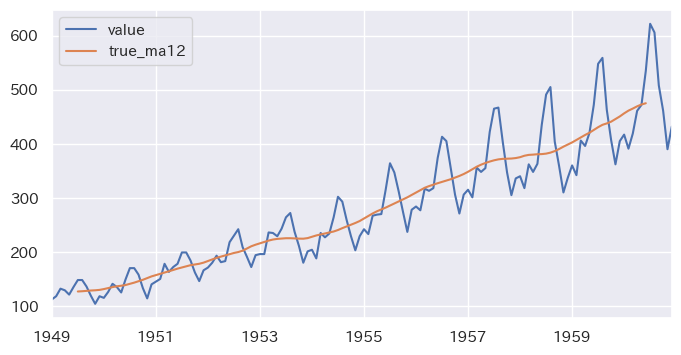

In [39]:
# 12ÊôÇÁÇπ‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥ÂùáÔºà„Éà„É¨„É≥„ÉâÊäΩÂá∫Ôºâ„ÅÆÂÆüË£Ö

# ÁõÆÁöÑÔºö
#   ÊúàÊ¨°„ÅÆÂ§âÂãï„ÅåÂ§ß„Åç„ÅÑ„ÄåÈ£õË°åÊ©ü‰πóÂÆ¢Êï∞„Éá„Éº„Çø„Äç„Åã„Çâ„ÄÅ
#   Èï∑ÊúüÁöÑ„Å™„Éà„É¨„É≥„ÉâÔºàÊªë„Çâ„Åã„Å™Â§âÂåñÔºâ„ÇíÂèñ„ÇäÂá∫„Åô„ÄÇ

# Âá¶ÁêÜÊâãÈ†ÜÔºö
# -------------------------------------------------------
# ‚ë† 12ÊôÇÁÇπÂçòÁ¥îÁßªÂãïÂπ≥ÂùáÔºàma12_centerÔºâÔºö
#     - ÂêÑÊúà„Çí‰∏≠ÂøÉ„Å®„Åó„Å¶ÂâçÂæå6„ÅãÊúà„ÇíÂê´„ÇÄ12„ÅãÊúàÂàÜ„ÅÆÂπ≥Âùá„ÇíË®àÁÆó„ÄÇ
#     - Â≠£ÁØÄÁöÑ„Å™Âë®Êúü„Çí„Åä„Åä„Åæ„Åã„Å´Âπ≥ÊªëÂåñ„Åô„Çã„ÄÇ

# ‚ë° ‰∫åÈáçÁßªÂãïÂπ≥ÂùáÔºàtrue_ma12ÔºâÔºö
#     - 12ÊôÇÁÇπÁßªÂãïÂπ≥Âùá(ma12_center)„Å´ÂØæ„Åó„Å¶„Åï„Çâ„Å´2ÊôÇÁÇπ„ÅÆÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó„ÄÇ
#     - shift(-1)„ÅßÊôÇÁ≥ªÂàó„ÅÆ‰∏≠ÂøÉ„ÇíÊèÉ„Åà„ÄÅ„Äå‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„Äç„ÇíÂÆüÁèæ„ÄÇ
#     - „Åì„Çå„Å´„Çà„Çä„ÄÅ„Çà„ÇäÊ≠£Á¢∫„Å™„Éà„É¨„É≥„ÉâÁ∑ö„ÇíÂæó„Çã„ÄÇ

# ‚ë¢ ÂèØË¶ñÂåñÔºö
#     - ÂéüÁ≥ªÂàóÔºàvalueÔºâ„Å®‰∏≠ÂøÉÂåñ12ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÔºàtrue_ma12Ôºâ„ÇíÊØîËºÉ„ÄÇ
#     - Â≠£ÁØÄÂ§âÂãï„Çí„Å™„Çâ„Åó„ÅüÈï∑ÊúüÂÇæÂêë„ÇíË¶ñË¶öÁöÑ„Å´Á¢∫Ë™ç„Åß„Åç„Çã„ÄÇ

air_passengers_ma["ma12_center"] = (
    air_passengers_ma["value"].rolling(window=12, center=True).mean()
)

air_passengers_ma["true_ma12"] = (
    air_passengers_ma["ma12_center"].rolling(window=2).mean().shift(-1)
)

# ÂéüÁ≥ªÂàó„Å®12ÊôÇÁÇπ‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÅÆÊØîËºÉ„Çí„Éó„É≠„ÉÉ„Éà
air_passengers_ma[["value", "true_ma12"]].plot()

In [40]:
# Êúà„Åî„Å®„ÅÆÊ∞óË±°„Éá„Éº„ÇøÔºà‰æãÔºöÂπ≥ÂùáÊ∞óÊ∏©„ÉªÈôçÊ∞¥Èáè„Å™„Å©Ôºâ„ÅÆË™≠„ÅøËæº„Åø„Å®Á¢∫Ë™ç

# ÁõÆÁöÑÔºö
#   ÊôÇÁ≥ªÂàóËß£Êûê„ÅÆÂØæË±°„Å®„Å™„ÇãÊúàÊ¨°„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø„ÄÅ
#   Pandas „ÅÆ DateTimeIndex „Å®„Åó„Å¶Ê≠£„Åó„ÅèÊâ±„Åà„Çã„Çà„ÅÜÊï¥ÂΩ¢„Åô„Çã„ÄÇ

# Âá¶ÁêÜÂÜÖÂÆπÔºö
# -------------------------------------------------------
# ‚ë† CSV„Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøËæº„ÇÄÔºö
#     - „Éï„Ç°„Ç§„É´ÂêçÔºö'2-5-1-weather-month.csv'
#     - 'Âπ¥Êúà'Âàó„ÇíÊôÇÁ≥ªÂàó„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÔºàindex_colÔºâ„Å®„Åó„Å¶‰ΩøÁî®„ÄÇ
#     - parse_dates=True „Å´„Çà„Çä„ÄÅÂπ¥Êúà„ÇíÊó•‰ªòÂûãÔºàdatetime64Ôºâ„Å´Ëá™ÂãïÂ§âÊèõ„ÄÇ
#     - dtype='float' „Å´„Çà„ÇäÊï∞ÂÄ§„Éá„Éº„Çø„Å®„Åó„Å¶Ë™≠„ÅøËæº„Åø„ÄÇ

# ‚ë° ÊôÇÁ≥ªÂàó„ÅÆÈ†ªÂ∫¶„ÇíÊòéÁ§∫ÁöÑ„Å´ÊåáÂÆöÔºö
#     - freq='MS' „ÅØ„ÄåMonth StartÔºàÂêÑÊúà„ÅÆÂàùÊó•Ôºâ„Äç„ÇíÊÑèÂë≥„Åô„Çã„ÄÇ
#     - „Åì„Çå„Å´„Çà„Çä„ÄÅPandas „ÅåËá™ÂãïÁöÑ„Å´ÊúàÂçò‰Ωç„ÅÆÂë®ÊúüÊÄß„ÇíÁêÜËß£„Åß„Åç„Çã„ÄÇ

# ‚ë¢ „Éá„Éº„ÇøÁ¢∫Ë™çÔºö
#     - head(3)ÔºöÊúÄÂàù„ÅÆ3Ë°å„ÇíË°®Á§∫„ÄÇ
#     - tail(3)ÔºöÊúÄÂæå„ÅÆ3Ë°å„ÇíË°®Á§∫„ÄÇ
#     - „Éá„Éº„Çø„ÅÆÊßãÈÄ†„Å®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆÊï¥ÂêàÊÄß„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

weather_month = pd.read_csv(
    "2-5-1-weather-month.csv",  # ÊúàÊ¨°Ê∞óË±°„Éá„Éº„Çø
    index_col="Âπ¥Êúà",  # 'Âπ¥Êúà'Âàó„Çí„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Å´ÊåáÂÆö
    parse_dates=True,  # Êó•‰ªòÂûã„Å´Â§âÊèõ
    dtype="float",  # Êï∞ÂÄ§Âûã„Å®„Åó„Å¶Ë™≠„ÅøËæº„Åø
)

# ÊúàÂàùÊó•ÔºàMS: Month StartÔºâ„Çí„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆÈ†ªÂ∫¶„Å®„Åó„Å¶ÊåáÂÆö
weather_month.index.freq = "MS"

# „Éá„Éº„Çø„ÅÆÂÜíÈ†≠„Å®Êú´Â∞æ„ÇíË°®Á§∫„Åó„Å¶Á¢∫Ë™ç
print(weather_month.head(3))
print(weather_month.tail(3))

            Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)  Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞(Êó•)
Âπ¥Êúà                                              
1900-01-01          1.6                        0.0
1900-02-01          3.1                        0.0
1900-03-01          5.7                        0.0
            Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)  Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞(Êó•)
Âπ¥Êúà                                              
2021-10-01         18.2                        0.0
2021-11-01         13.7                        0.0
2021-12-01          7.9                        0.0


<Axes: xlabel='Âπ¥Êúà'>

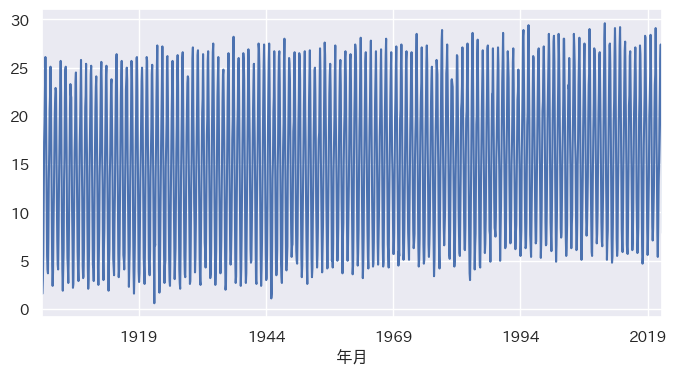

In [41]:
weather_month["Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)"].plot()

In [42]:
# Âπ¥„Åî„Å®„ÅÆ„Äå35‚ÑÉ‰ª•‰∏ä„ÅÆÊó•Êï∞„Äç„ÅÆÈõÜË®à

# ÁõÆÁöÑÔºö
#   - ÊúàÊ¨°„Éá„Éº„ÇøÔºàweather_monthÔºâ„Åã„Çâ„ÄÅ
#     Âπ¥Âçò‰Ωç„Åß„ÅÆ„ÄåÁåõÊöëÊó•Ôºà35‚ÑÉ‰ª•‰∏ä„ÅÆÊó•Êï∞Ôºâ„Äç„ÅÆÂêàË®à„ÇíÁÆóÂá∫„Åô„Çã„ÄÇ
#   - Âπ¥Ê¨°Âçò‰Ωç„ÅÆÂÇæÂêëÔºàÊ∞óÂÄôÂ§âÂãï„Å™„Å©Ôºâ„ÇíÁ¢∫Ë™ç„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„Çã„ÄÇ

# Âá¶ÁêÜÂÜÖÂÆπÔºö
# -------------------------------------------------------
# ‚ë† resample('YS').sum()Ôºö
#     - 'YS' „ÅØ„ÄåYear StartÔºàÂêÑÂπ¥„ÅÆÂàùÊó•Ôºâ„Äç„ÇíÊÑèÂë≥„Åô„Çã„ÄÇ
#     - „Å§„Åæ„Çä„ÄåÂπ¥Ê¨°Âçò‰Ωç„Äç„Å´ÂÜç„Çµ„É≥„Éó„É™„É≥„Ç∞„ÇíË°å„ÅÑ„ÄÅÊúà„Åî„Å®„ÅÆÂêàË®àÂÄ§„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ
#     - sum() „Å´„Çà„Çä„ÄÅ„Åù„ÅÆÂπ¥„Å´Áô∫Áîü„Åó„ÅüÁåõÊöëÊó•Êï∞„ÅÆÁ∑èË®à„ÇíÁÆóÂá∫„ÄÇ

# ‚ë° drop('Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)', axis=1)Ôºö
#     - Âπ¥„Åî„Å®„ÅÆÂêàË®à„Å´„ÅØ‰∏çË¶Å„Å™„ÄåÂπ≥ÂùáÊ∞óÊ∏©„ÄçÂàó„ÇíÂâäÈô§„ÄÇ
#     - Âπ¥ÈñìÈõÜË®à„ÅÆÁõÆÁöÑ„ÅØ„Äå35‚ÑÉ‰ª•‰∏äÊó•Êï∞„Äç„Å´Áµû„Çã„ÄÇ

# ‚ë¢ Âá∫ÂäõÁ¢∫Ë™çÔºö
#     - head(3)ÔºöÊúÄÂàù„ÅÆ3Âπ¥ÂàÜ„ÇíË°®Á§∫„ÄÇ
#     - tail(3)ÔºöÊúÄÂæå„ÅÆ3Âπ¥ÂàÜ„ÇíË°®Á§∫„ÄÇ
#     - Âπ¥Âçò‰Ωç„Å´Ê≠£„Åó„ÅèÈõÜË®à„Åï„Çå„Å¶„ÅÑ„Çã„Åã„ÇíÁ¢∫Ë™ç„ÄÇ

# ÁµêÊûúÔºö
#     ÂêÑÂπ¥„Å´„Åä„Åë„Çã„Äå35‚ÑÉ‰ª•‰∏ä„ÅÆÊó•Êï∞„Äç„ÅåË°®Á§∫„Åï„Çå„Çã„ÄÇ

# Âπ¥Ê¨°„Çµ„É≥„Éó„É™„É≥„Ç∞„Å´„Çà„ÇãÈõÜË®à
weather_year = weather_month.resample("YS").sum()

# ‰∏çË¶Å„Å™Âπ≥ÂùáÊ∞óÊ∏©Âàó„ÇíÂâäÈô§
weather_year = weather_year.drop("Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)", axis=1)

# ÁµêÊûú„ÅÆÁ¢∫Ë™çÔºàÂÖàÈ†≠3Ë°å„Å®Êú´Â∞æ3Ë°åÔºâ
print(weather_year.head(3))
print(weather_year.tail(3))

            Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞(Êó•)
Âπ¥Êúà                                 
1900-01-01                        1.0
1901-01-01                        1.0
1902-01-01                        0.0
            Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞(Êó•)
Âπ¥Êúà                                 
2019-01-01                       12.0
2020-01-01                       12.0
2021-01-01                        2.0


<Axes: title={'center': 'Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞'}, xlabel='Âπ¥', ylabel='Êó•Êï∞'>

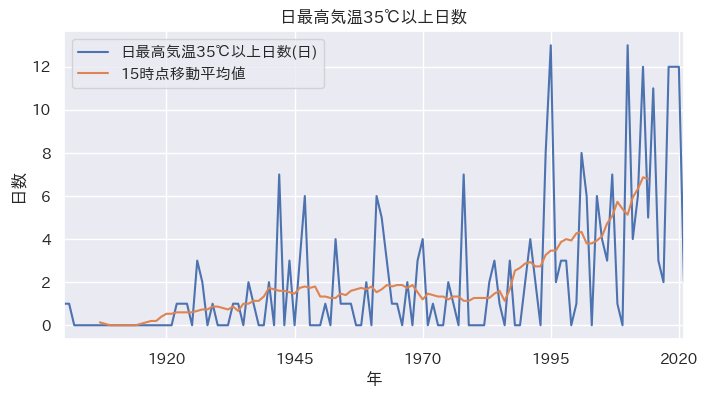

In [43]:
# 15ÊôÇÁÇπÔºà15Âπ¥ÂàÜÔºâ„ÅÆÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó„Åó„ÄÅÈï∑ÊúüÁöÑ„Å™Ê∞óÊ∏©ÂÇæÂêë„ÇíÂèØË¶ñÂåñ„Åô„Çã

# Âá¶ÁêÜ„ÅÆÁõÆÁöÑÔºö
#   - Âπ¥„Åî„Å®„ÅÆ„Äå35‚ÑÉ‰ª•‰∏äÊó•Êï∞„Äç„Éá„Éº„Çø„Åã„ÇâÁü≠ÊúüÁöÑ„Å™Â§âÂãï„Çí„Å™„Çâ„Åó„ÄÅ
#     Èï∑ÊúüÁöÑ„Å™Ê∞óÂÄôÂ§âÂãï„ÅÆÂÇæÂêëÔºàÁåõÊöëÊó•„ÅÆÂ¢óÊ∏õÔºâ„ÇíË¶ã„ÇÑ„Åô„Åè„Åô„Çã„ÄÇ
#   - ÁßªÂãïÂπ≥Âùá„ÅØÊ∞óÂÄôÂàÜÊûê„ÇÑÊôÇÁ≥ªÂàóÂàÜÊûê„Å´„Åä„Åë„Çã‰ª£Ë°®ÁöÑ„Å™Âπ≥ÊªëÂåñÊâãÊ≥ï„Åß„ÅÇ„Çã„ÄÇ

# Âá¶ÁêÜÂÜÖÂÆπÔºö
# -------------------------------------------------------
# ‚ë† rolling(window=15, center=True).mean():
#     - „Äåwindow=15„Äç„Åß15Âπ¥Èñì„ÅÆÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó„ÄÇ
#     - „Äåcenter=True„Äç„Å´„Çà„Çä„ÄÅÁßªÂãïÂπ≥Âùá„ÇíÂêÑÊúüÈñì„ÅÆ‰∏≠Â§ÆÔºà7Âπ¥ÁõÆ‰ªòËøëÔºâ„Å´ÂØæÂøú„Å•„Åë„Çã„ÄÇ
#     - „Åì„Çå„Å´„Çà„Çä„ÄÅ„Éà„É¨„É≥„Éâ„ÅåÊôÇÈñìËª∏„Å´ÂØæ„Åó„Å¶Ëá™ÁÑ∂„Å´Ë°®Á§∫„Åï„Çå„Çã„ÄÇ

# ‚ë° Êñ∞„Åó„ÅÑÂàóÂêç„Äå15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§„Äç„ÇíËøΩÂä†Ôºö
#     - Âπ≥ÊªëÂåñÂæå„ÅÆÁµêÊûú„ÇíÂà•Âàó„Å´‰øùÊåÅ„Åó„ÄÅÂÖÉ„ÅÆ„Éá„Éº„Çø„Å®ÊØîËºÉÂèØËÉΩ„Å´„Åô„Çã„ÄÇ

# ‚ë¢ plot():
#     - ÂéüÁ≥ªÂàóÔºàÁåõÊöëÊó•Êï∞Ôºâ„Å®15Âπ¥ÁßªÂãïÂπ≥ÂùáÁ≥ªÂàó„ÇíÈáç„Å≠„Å¶Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅßÊèèÁîª„ÄÇ
#     - xlabel / ylabel / title „Å´„Çà„Çä„ÄÅÊó•Êú¨Ë™û„ÅÆ„É©„Éô„É´„Çí‰ªò‰∏é„Åó„Å¶Ë¶ñË¶öÁöÑ„Å´ÁêÜËß£„Åó„ÇÑ„Åô„Åè„Åô„Çã„ÄÇ

# ÁµêÊûú„ÅÆËß£ÈáàÔºö
#     - Êäò„ÇåÁ∑ö„ÅÆÁ¥∞„Åã„Å™‰∏ä‰∏ãÂãïÔºöÂπ¥„Åî„Å®„ÅÆÁåõÊöëÊó•Êï∞„ÅÆ„Å∞„Çâ„Å§„Åç„ÄÇ
#     - Â§™„ÅèÊªë„Çâ„Åã„Å™Á∑öÔºàÁßªÂãïÂπ≥ÂùáÔºâÔºöÈï∑ÊúüÁöÑ„Å™Ê∞óÊ∏©‰∏äÊòá„Éª‰∏ãÈôç„ÅÆÂÇæÂêë„ÇíÁ§∫„Åô„ÄÇ

# -------------------------------------------------------

# 15Âπ¥„ÅÆ‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó
weather_year["15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"] = (
    weather_year["Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞(Êó•)"].rolling(window=15, center=True).mean()
)

# Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÇíÊèèÁîªÔºàÂéüÁ≥ªÂàó„Å®ÁßªÂãïÂπ≥Âùá„ÅÆÊØîËºÉÔºâ
weather_year[["Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞(Êó•)", "15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"]].plot(
    title="Êó•ÊúÄÈ´òÊ∞óÊ∏©35‚ÑÉ‰ª•‰∏äÊó•Êï∞", xlabel="Âπ¥", ylabel="Êó•Êï∞"
)

<Axes: title={'center': 'ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÂπ≥ÂùáÂÄ§'}, xlabel='Âπ¥', ylabel='Ê∞óÊ∏©(‚ÑÉ)'>

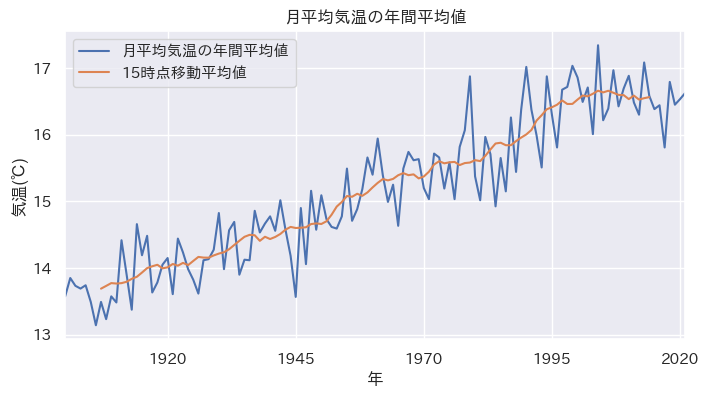

In [44]:
# ÊúàÂπ≥ÂùáÊ∞óÊ∏©„Éá„Éº„Çø„Çí„ÇÇ„Å®„Å´„ÄÅÂπ¥Âçò‰Ωç„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„Å®„Åù„ÅÆÈï∑ÊúüÁöÑÂÇæÂêë„ÇíÂèØË¶ñÂåñ„Åô„Çã„Ç≥„Éº„Éâ

# -------------------------------------------------------
# Âá¶ÁêÜ„ÅÆÁõÆÁöÑÔºö
#   - ÂêÑÂπ¥„ÅÆ„ÄåÊúàÂπ≥ÂùáÊ∞óÊ∏©„Äç„Çí„Åæ„Å®„ÇÅ„Å¶Âπ¥ÈñìÂπ≥Âùá„ÇíÁÆóÂá∫„Åó„ÄÅ
#     Ê∞óÊ∏©Â§âÂãï„ÅÆÈï∑Êúü„Éà„É¨„É≥„ÉâÔºàÊ∏©ÊöñÂåñ„Å™„Å©Ôºâ„ÇíÊääÊè°„Åô„Çã„ÄÇ
#   - ÁßªÂãïÂπ≥Âùá„ÇíÁî®„ÅÑ„Çã„Åì„Å®„Åß„ÄÅÁü≠ÊúüÁöÑ„Å™Ê∞óÊ∏©Â§âÂãï„ÇíÂπ≥ÊªëÂåñ„Åó„ÄÅ
#     Ê∞óÂÄôÂ§âÂãï„ÅÆÂÖ®‰ΩìÁöÑ„Å™ÂÇæÂêë„ÇíË¶ñË¶öÁöÑ„Å´Êòé„Çâ„Åã„Å´„Åô„Çã„ÄÇ

# Âá¶ÁêÜÂÜÖÂÆπÔºö
# -------------------------------------------------------
# ‚ë† Âπ¥„Åî„Å®„ÅÆ„ÄåÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÂπ≥ÂùáÂÄ§„Äç„ÇíÁÆóÂá∫
#     - weather_month['Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)'] „ÇíÂà©Áî®„ÄÇ
#     - resample('YS').mean() „Å´„Çà„Çä„ÄÅÂπ¥Âàù„ÇíÂü∫Ê∫ñ„Å®„Åó„ÅüÂπ¥Âçò‰Ωç„ÅÆÂπ≥ÂùáÂÄ§„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ
#       ‚Äª 'YS' „ÅØ ‚ÄúYear Start‚Äù „ÅÆÁï•„Åß„ÄÅÂπ¥Âàù„Åî„Å®„Å´„Éá„Éº„Çø„Çí„Åæ„Å®„ÇÅ„ÇãÈ†ªÂ∫¶ÊåáÂÆö„ÄÇ

# ‚ë° 15Âπ¥ÁßªÂãïÂπ≥Âùá„ÅÆË®àÁÆó
#     - rolling(window=15, center=True).mean() „Çí‰Ωø„ÅÑ„ÄÅ
#       15Âπ¥Èñì„ÅÆÂπ≥ÂùáÂÄ§„Çí‰∏≠Â§Æ„Å´ÈÖçÁΩÆ„Åô„ÇãÔºà‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥ÂùáÔºâ„ÄÇ
#     - „Åì„Çå„Å´„Çà„ÇäÈï∑Êúü„Éà„É¨„É≥„Éâ„ÇíÊªë„Çâ„Åã„Å´Ë°®Á§∫ÂèØËÉΩ„ÄÇ

# ‚ë¢ „Ç∞„É©„ÉïÊèèÁîª
#     - Âπ¥„Åî„Å®„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„Å®15Âπ¥ÁßªÂãïÂπ≥Âùá„ÇíÂêåÊôÇ„Å´„Éó„É≠„ÉÉ„Éà„ÄÇ
#     - Ê®™Ëª∏ÔºöÂπ¥„ÄÅÁ∏¶Ëª∏ÔºöÊ∞óÊ∏©Ôºà‚ÑÉÔºâ„ÄÇ
#     - „Çø„Ç§„Éà„É´„Åä„Çà„Å≥Ëª∏„É©„Éô„É´„ÇíÊó•Êú¨Ë™û„ÅßÊåáÂÆö„ÄÇ

# ÁµêÊûú„ÅÆËß£ÈáàÔºö
#     - Á¥∞„ÅÑÊäò„ÇåÁ∑öÔºöÂπ¥„Åî„Å®„ÅÆÊ∞óÊ∏©Â§âÂåñ„ÇíË°®„Åô„ÄÇ
#     - Êªë„Çâ„Åã„Å™Á∑öÔºöÈï∑ÊúüÁöÑ„Å™Ê∏©ÊöñÂåñ„Åæ„Åü„ÅØÂØíÂÜ∑Âåñ„ÅÆÂÇæÂêë„ÇíÁ§∫„Åô„ÄÇ
# -------------------------------------------------------

# Âπ¥ÈñìÂπ≥ÂùáÊ∞óÊ∏©„ÇíË®àÁÆó
weather_year["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÂπ≥ÂùáÂÄ§"] = (
    weather_month["Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)"].resample("YS").mean()
)

# 15Âπ¥‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó
weather_year["15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"] = (
    weather_year["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÂπ≥ÂùáÂÄ§"].rolling(window=15, center=True).mean()
)

# Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅßÊ∞óÊ∏©Â§âÂåñ„ÇíÂèØË¶ñÂåñ
weather_year[["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÂπ≥ÂùáÂÄ§", "15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"]].plot(
    title="ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÂπ≥ÂùáÂÄ§", xlabel="Âπ¥", ylabel="Ê∞óÊ∏©(‚ÑÉ)"
)

<Axes: title={'center': 'ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ§ßÂÄ§'}, xlabel='Âπ¥', ylabel='Ê∞óÊ∏©(‚ÑÉ)'>

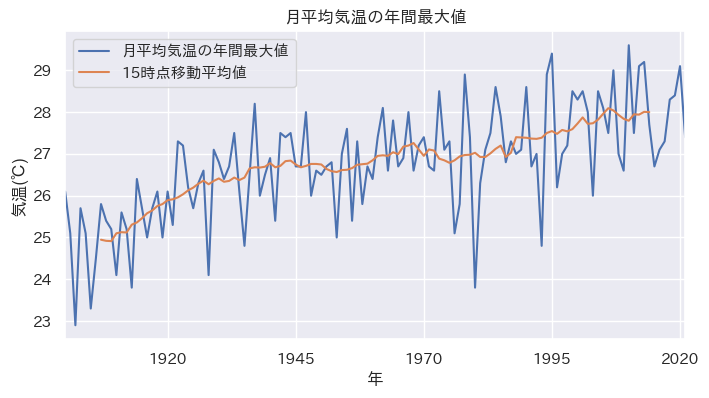

In [45]:
# -------------------------------------------------------
# üìä ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥Èñì„ÄåÊúÄÂ§ßÂÄ§„Äç„Çí„ÇÇ„Å®„Å´Èï∑Êúü„Éà„É¨„É≥„Éâ„ÇíÂàÜÊûê„Åô„Çã„Ç≥„Éº„Éâ
# -------------------------------------------------------

# Âá¶ÁêÜ„ÅÆÁõÆÁöÑÔºö
#   - ÂêÑÂπ¥„Å´„Åä„Åë„Çã„ÄåÊúÄ„ÇÇÊöë„ÅÑÊúàÔºàÂπ≥ÂùáÊ∞óÊ∏©„ÅåÊúÄÂ§ß„ÅÆÊúàÔºâ„Äç„ÇíÊäΩÂá∫„Åó„ÄÅ
#     Âπ¥„Åî„Å®„ÅÆÊúÄÈ´òÊ∞óÊ∏©ÂÇæÂêë„ÇíÂàÜÊûê„Åô„Çã„ÄÇ
#   - Áü≠ÊúüÁöÑ„Å™Âπ¥„Åî„Å®„ÅÆ„Å∞„Çâ„Å§„Åç„ÇíÂπ≥ÊªëÂåñ„Åô„Çã„Åü„ÇÅ„Å´„ÄÅ
#     15Âπ¥Èñì„ÅÆ‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíÁÆóÂá∫„Åó„Å¶Èï∑ÊúüÁöÑ„Å™‰∏äÊòáÂÇæÂêë„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

# Âá¶ÁêÜÊâãÈ†ÜÔºö
# -------------------------------------------------------
# ‚ë† Âπ¥„Åî„Å®„ÅÆÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÊúÄÂ§ßÂÄ§„ÇíË®àÁÆóÔºö
#     - weather_month['Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)'] „ÇíÂØæË±°„Å´ resample('YS').max() „ÇíÂÆüË°å„ÄÇ
#     - „Åì„Çå„Å´„Çà„Çä„Äå„Åù„ÅÆÂπ¥„ÅÆ‰∏≠„ÅßÊúÄ„ÇÇÊöë„ÅÑÊúà„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„Äç„ÅåÂæó„Çâ„Çå„Çã„ÄÇ

# ‚ë° 15Âπ¥‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆóÔºö
#     - rolling(window=15, center=True).mean() „Å´„Çà„Çä„ÄÅ
#       15Âπ¥Èñì„ÅÆÂπ≥ÂùáÂÄ§„Çí„Äå‰∏≠Â§Æ„Äç„Å´ÈÖçÁΩÆ„Åó„Å¶Âπ≥ÊªëÂåñ„ÄÇ
#     - Âπ¥„Åî„Å®„ÅÆ„Å∞„Çâ„Å§„Åç„ÇíÈô§Âéª„Åó„ÄÅÈï∑ÊúüÁöÑ„Å™Ê∏©ÊöñÂåñÂÇæÂêë„ÇíÊääÊè°„ÄÇ

# ‚ë¢ ÂèØË¶ñÂåñÔºö
#     - ÂéüÁ≥ªÂàóÔºàÂπ¥„Åî„Å®„ÅÆÊúÄÂ§ßÊúàÂπ≥ÂùáÊ∞óÊ∏©Ôºâ„Å®ÁßªÂãïÂπ≥Âùá„ÇíÈáç„Å≠„Å¶ÊèèÁîª„ÄÇ
#     - „Çø„Ç§„Éà„É´„Å´„ÄåÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ§ßÂÄ§„Äç„Å®ÊòéÁ§∫„Åó„ÄÅ
#       Èï∑ÊúüÁöÑ„Å™Ê∞óÂÄôÂ§âÂãï„ÇíË¶ñË¶öÁöÑ„Å´ÁêÜËß£„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„Çã„ÄÇ

# ÁµêÊûú„ÅÆË™≠„ÅøÊñπÔºö
#     - Êäò„ÇåÁ∑öÔºàÈùíÔºâÔºöÂêÑÂπ¥„ÅÆ„ÄåÊúÄ„ÇÇÊöë„ÅÑÊúà„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„Äç„ÄÇ
#     - Âπ≥ÊªëÁ∑öÔºà„Ç™„É¨„É≥„Ç∏ÔºâÔºö15Âπ¥Âçò‰Ωç„ÅÆÈï∑ÊúüÁöÑ„Å™Ê∞óÊ∏©‰∏äÊòáÂÇæÂêë„ÄÇ
# -------------------------------------------------------

# Âπ¥„Åî„Å®„ÅÆÊúÄÂ§ßÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÇíÁÆóÂá∫
weather_year["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ§ßÂÄ§"] = (
    weather_month["Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)"].resample("YS").max()
)

# 15Âπ¥‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíÁÆóÂá∫
weather_year["15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"] = (
    weather_year["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ§ßÂÄ§"].rolling(window=15, center=True).mean()
)

# Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅßÊØîËºÉË°®Á§∫
weather_year[["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ§ßÂÄ§", "15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"]].plot(
    title="ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ§ßÂÄ§", xlabel="Âπ¥", ylabel="Ê∞óÊ∏©(‚ÑÉ)"
)

<Axes: title={'center': 'ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ∞èÂÄ§'}, xlabel='Âπ¥', ylabel='Ê∞óÊ∏©(‚ÑÉ)'>

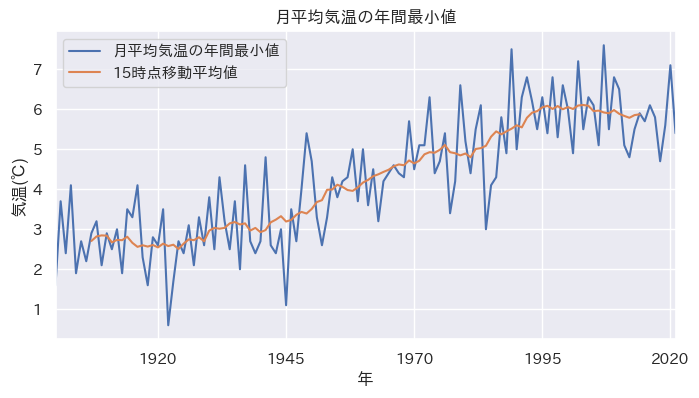

In [46]:
# -------------------------------------------------------
# üå°Ô∏è ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥Èñì„ÄåÊúÄÂ∞èÂÄ§„Äç„Çí„ÇÇ„Å®„Å´ÂØíÂÜ∑ÂÇæÂêë„ÇíÂàÜÊûê„Åô„Çã„Ç≥„Éº„Éâ
# -------------------------------------------------------

# Âá¶ÁêÜ„ÅÆÁõÆÁöÑÔºö
#   - ÂêÑÂπ¥„Å´„Åä„Åë„Çã„ÄåÊúÄ„ÇÇÂØí„ÅÑÊúàÔºàÂπ≥ÂùáÊ∞óÊ∏©„ÅåÊúÄ„ÇÇ‰Ωé„ÅÑÊúàÔºâ„Äç„ÇíÊäΩÂá∫„Åó„ÄÅ
#     Âπ¥„Åî„Å®„ÅÆÂØíÂÜ∑ÂÇæÂêë„ÇíÂàÜÊûê„Åô„Çã„ÄÇ
#   - Áü≠ÊúüÁöÑ„Å™Â§âÂãï„ÇíÂπ≥ÊªëÂåñ„Åó„ÄÅÈï∑ÊúüÁöÑ„Å™ÂØíÊöñ„ÅÆÊé®Áßª„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

# Âá¶ÁêÜÊâãÈ†ÜÔºö
# -------------------------------------------------------
# ‚ë† Âπ¥„Åî„Å®„ÅÆÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÊúÄÂ∞èÂÄ§„ÇíÁÆóÂá∫Ôºö
#     - weather_month['Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)'] „ÇíÂØæË±°„Å´ resample('YS').min() „ÇíÂÆüË°å„ÄÇ
#     - „Åì„Çå„Å´„Çà„Çä„Äå„Åù„ÅÆÂπ¥„ÅßÊúÄ„ÇÇÂØí„ÅÑÊúà„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„Äç„ÅåÂæó„Çâ„Çå„Çã„ÄÇ
#       Ôºà‰æãÔºö1Êúà„ÇÑ2Êúà„ÅÆ„Çà„ÅÜ„Å™ÂÜ¨Â≠£„ÅÆÂπ≥ÂùáÂÄ§Ôºâ

# ‚ë° 15Âπ¥‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆóÔºö
#     - rolling(window=15, center=True).mean() „Å´„Çà„Çä„ÄÅ
#       15Âπ¥Èñì„ÅÆÂπ≥ÂùáÂÄ§„Çí‰∏≠Â§Æ„Å´ÈÖçÁΩÆ„Åó„Å¶Âπ≥ÊªëÂåñ„ÄÇ
#     - Áü≠ÊúüÁöÑ„Å™ÂØíÊ≥¢„ÉªÊöñÂÜ¨„ÅÆÂΩ±Èüø„ÇíÈô§„Åç„ÄÅÊ∞óÂÄôÂ§âÂãï„ÅÆÈï∑Êúü„Éà„É¨„É≥„Éâ„ÇíÁ¢∫Ë™ç„Åß„Åç„Çã„ÄÇ

# ‚ë¢ ÂèØË¶ñÂåñÔºö
#     - Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„Åß„ÄåÊúÄÂ∞èÊ∞óÊ∏©„ÅÆÂπ¥Ê¨°Êé®Áßª„Äç„Å®
#       „Äå15Âπ¥ÁßªÂãïÂπ≥ÂùáÁ∑ö„Äç„ÇíÈáç„Å≠„Å¶Ë°®Á§∫„ÄÇ
#     - „Çø„Ç§„Éà„É´„ÄåÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ∞èÂÄ§„Äç„Åß„ÄÅ
#       „Å©„ÅÆ„Çà„ÅÜ„Å™Ë¶≥Ê∏¨„ÇíÁ§∫„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÊòéÁ¢∫Âåñ„ÄÇ

# ÁµêÊûú„ÅÆË™≠„ÅøÊñπÔºö
#     - ÈùíÁ∑öÔºöÂêÑÂπ¥„ÅÆ„ÄåÊúÄ„ÇÇÂØí„ÅÑÊúà„ÅÆÂπ≥ÂùáÊ∞óÊ∏©„Äç„ÄÇ
#     - „Ç™„É¨„É≥„Ç∏Á∑öÔºö15Âπ¥Âçò‰Ωç„ÅÆÂØíÂÜ∑ÂÇæÂêë„ÅÆÂ§âÂåñ„ÄÇ
#     - ÂÖ®‰ΩìÁöÑ„Å´‰∏äÊòáÂÇæÂêë„Åß„ÅÇ„Çå„Å∞„ÄÅÂÜ¨„ÅÆÂØí„Åï„ÅåÂíå„Çâ„ÅÑ„Åß„ÅÑ„Çã„Åì„Å®„ÇíÊÑèÂë≥„Åô„Çã„ÄÇ
# -------------------------------------------------------

# Âπ¥„Åî„Å®„ÅÆÊúÄÂ∞èÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÇíÁÆóÂá∫
weather_year["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ∞èÂÄ§"] = (
    weather_month["Âπ≥ÂùáÊ∞óÊ∏©(‚ÑÉ)"].resample("YS").min()
)

# 15Âπ¥‰∏≠ÂøÉÂåñÁßªÂãïÂπ≥Âùá„ÇíÁÆóÂá∫
weather_year["15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"] = (
    weather_year["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ∞èÂÄ§"].rolling(window=15, center=True).mean()
)

# Êäò„ÇåÁ∑ö„Ç∞„É©„Éï„ÅßÊØîËºÉË°®Á§∫
weather_year[["ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ∞èÂÄ§", "15ÊôÇÁÇπÁßªÂãïÂπ≥ÂùáÂÄ§"]].plot(
    title="ÊúàÂπ≥ÂùáÊ∞óÊ∏©„ÅÆÂπ¥ÈñìÊúÄÂ∞èÂÄ§", xlabel="Âπ¥", ylabel="Ê∞óÊ∏©(‚ÑÉ)"
)